This Python notebook is focused on the usage of Neural Networks and Support Vector Regression for the task of WN the specific application, Seasonal Energy Use Analysis (as is described in the Thesis: "ML-ASSISTED DATA ANALYTICS AND WEATHER NORMALIZATION TO AID IN COMMERCIAL BUILDING ENERGY AUDITS").

# Libraries & Packages

In [ ]:
pip install tensorflow

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from scipy.interpolate import griddata
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import and organize data:

# Importing MONTHLY file from GitHub for Monthly Data
url_monthly = 'https://raw.githubusercontent.com/gvanwalsen/adv-weather-norm/main/LV_B1_monthlyrawdata.csv'
df_monthly = pd.read_csv(url_monthly)

# Importing DAILY file from GitHub for Daily SVR attempt
url_daily = 'https://raw.githubusercontent.com/gvanwalsen/adv-weather-norm/main/LV_B1_dailyrawdata.csv'
df_daily = pd.read_csv(url_daily)

# Importing HOURLY file from GitHub for Daily SVR attempt
url_hourly = 'https://raw.githubusercontent.com/gvanwalsen/adv-weather-norm/main/LV_B1_hourlyrawdata.csv'
df_hourly = pd.read_csv(url_hourly)

# Light Data Re-arrangement
b1_daily_arr = np.array(df_daily)
b1_daily_raw = b1_daily_arr[0:1461,0:32]
# print(b1_daily_raw)

b1_hourly_arr = np.array(df_hourly)
b1_hourly_raw = b1_hourly_arr[0:36064,0:25]
# print(b1_hourly_raw)

b1_monthly_arr = np.array(df_monthly)
b1_monthly_raw = b1_monthly_arr[0:72,0:32]
# print(b1_monthly_raw)

b1_daily_df = pd.DataFrame({ 'Year': b1_daily_raw[:,1],
                            'Month': b1_daily_raw[:,2],
                                'EnergyUse': b1_daily_raw[:,6],
                                'Temp': b1_daily_raw[:,9],
                                'feelslike': b1_daily_raw[:,12],
                                'RelHum': b1_daily_raw[:,13],
                                'Humidity': b1_daily_raw[:,14],
                                'Precip': b1_daily_raw[:,15],
                                'Snow': b1_daily_raw[:,19],
                                'WindGust': b1_daily_raw[:,21],
                                'WindSpeed': b1_daily_raw[:,22],
                                'WindDir': b1_daily_raw[:,23],
                                'SeaLevelPressure': b1_daily_raw[:,24],
                                'CloudCover': b1_daily_raw[:,25],
                                'Visibility': b1_daily_raw[:,26],
                                'SolarRadiation': b1_daily_raw[:,27],
                                'SolarEnergy': b1_daily_raw[:,28],
                                'UVIndex': b1_daily_raw[:,29]})

b1_hourly_df = pd.DataFrame({ 'Year': b1_hourly_raw[:,0],
                                'Month': b1_hourly_raw[:,1],
                                'EnergyUse': b1_hourly_raw[:,6],
                                'Temp': b1_hourly_raw[:,7],
                                'feelslike': b1_hourly_raw[:,8],
                                'RelHum': b1_hourly_raw[:,9],
                                'Humidity': b1_hourly_raw[:,10],
                                'Precip': b1_hourly_raw[:,11],
                                'Snow': b1_hourly_raw[:,14],
                                'WindGust': b1_hourly_raw[:,16],
                                'WindSpeed': b1_hourly_raw[:,17],
                                'WindDir': b1_hourly_raw[:,18],
                                'SeaLevelPressure': b1_hourly_raw[:,19],
                                'CloudCover': b1_hourly_raw[:,20],
                                'Visibility': b1_hourly_raw[:,21],
                                'SolarRadiation': b1_hourly_raw[:,22],
                                'SolarEnergy': b1_hourly_raw[:,23],
                                'UVIndex': b1_hourly_raw[:,24]})

b1_monthly_df = pd.DataFrame({ 'Year': b1_monthly_raw[:,0],
                                'Month': b1_monthly_raw[:,1],
                                'EnergyUse': b1_monthly_raw[:,3],
                                'Temp': b1_monthly_raw[:,6],
                                'feelslike': b1_monthly_raw[:,9],
                                'RelHum': b1_monthly_raw[:,10],
                                'Humidity': b1_monthly_raw[:,11],
                                'Precip': b1_monthly_raw[:,12],
                                'Snow': b1_monthly_raw[:,16],
                                'WindGust': b1_monthly_raw[:,18],
                                'WindSpeed': b1_monthly_raw[:,19],
                                'WindDir': b1_monthly_raw[:,20],
                                'SeaLevelPressure': b1_monthly_raw[:,21],
                                'CloudCover': b1_monthly_raw[:,22],
                                'Visibility': b1_monthly_raw[:,23],
                                'SolarRadiation': b1_monthly_raw[:,24],
                                'SolarEnergy': b1_monthly_raw[:,25],
                                'UVIndex': b1_monthly_raw[:,26]})

# Feature Scaling (necessary for data to be scaled down ahead of NN processing)
sc_Xd = StandardScaler()
sc_yd = StandardScaler()

# Building 1, SVR (Seasonal Energy Use Analysis, Monthly)

In [ ]:
# Seperate Data by Season (DAILY)
b1_daily_winter = b1_daily_df[(b1_daily_df['Month'] == 1) | (b1_daily_df['Month'] == 2) | (b1_daily_df['Month'] == 12)]
# print(b1_daily_winter)

b1_daily_spring = b1_daily_df[(b1_daily_df['Month'] == 3) | (b1_daily_df['Month'] == 4) | (b1_daily_df['Month'] == 5)]
# print(b1_daily_spring)

b1_daily_summer = b1_daily_df[(b1_daily_df['Month'] == 6) | (b1_daily_df['Month'] == 7) | (b1_daily_df['Month'] == 8)]
# print(b1_daily_summer)

b1_daily_fall = b1_daily_df[(b1_daily_df['Month'] == 9) | (b1_daily_df['Month'] == 10) | (b1_daily_df['Month'] == 11)]
# print(b1_daily_fall)

# Seperate Data by Season (HOURLY)
b1_hourly_winter = b1_hourly_df[(b1_hourly_df['Month'] == 1) | (b1_hourly_df['Month'] == 2) | (b1_hourly_df['Month'] == 12)]
# print(b1_hourly_winter)

b1_hourly_spring = b1_hourly_df[(b1_hourly_df['Month'] == 3) | (b1_hourly_df['Month'] == 4) | (b1_hourly_df['Month'] == 5)]
# print(b1_hourly_spring)

b1_hourly_summer = b1_hourly_df[(b1_hourly_df['Month'] == 6) | (b1_hourly_df['Month'] == 7) | (b1_hourly_df['Month'] == 8)]
# print(b1_hourly_summer)

b1_hourly_fall = b1_hourly_df[(b1_hourly_df['Month'] == 9) | (b1_hourly_df['Month'] == 10) | (b1_hourly_df['Month'] == 11)]
# print(b1_hourly_fall)

# Seperate Date by Season (MONTHLY)
b1_monthly_winter = b1_monthly_df[(b1_monthly_df['Month'] == 1) | (b1_monthly_df['Month'] == 2) | (b1_monthly_df['Month'] == 12)]
# print(b1_monthly_winter)

b1_monthly_spring = b1_monthly_df[(b1_monthly_df['Month'] == 3) | (b1_monthly_df['Month'] == 4) | (b1_monthly_df['Month'] == 5)]
# print(b1_monthly_spring)

b1_monthly_summer = b1_monthly_df[(b1_monthly_df['Month'] == 6) | (b1_monthly_df['Month'] == 7) | (b1_monthly_df['Month'] == 8)]
# print(b1_monthly_summer)

b1_monthly_fall = b1_monthly_df[(b1_monthly_df['Month'] == 9) | (b1_monthly_df['Month'] == 10) | (b1_monthly_df['Month'] == 11)]
# print(b1_monthly_fall)

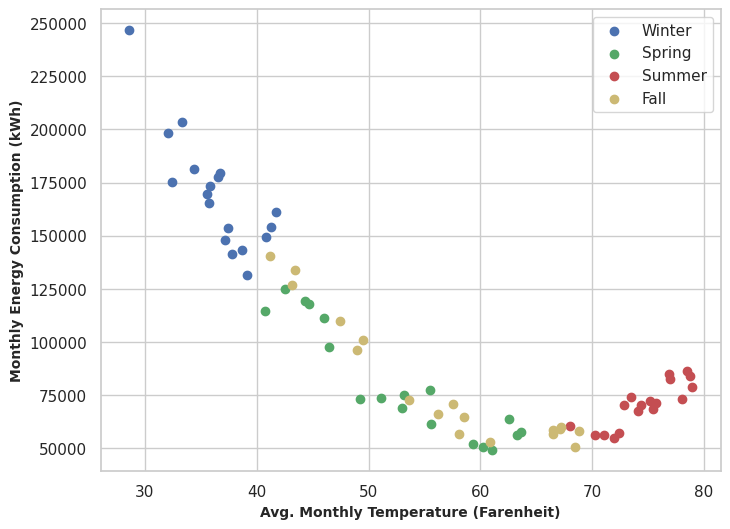

In [ ]:
# Plot MONTHLY to observe raw 2D data
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.scatter(b1_monthly_winter['Temp'], b1_monthly_winter['EnergyUse'], marker='o', color ='b', label ='Winter')
plt.scatter(b1_monthly_spring['Temp'], b1_monthly_spring['EnergyUse'], marker='o', color ='g', label ='Spring')
plt.scatter(b1_monthly_summer['Temp'], b1_monthly_summer['EnergyUse'], marker='o', color ='r', label ='Summer')
plt.scatter(b1_monthly_fall['Temp'], b1_monthly_fall['EnergyUse'], marker='o', color ='y', label ='Fall')
plt.xlabel('Avg. Monthly Temperature (Farenheit)', fontweight ='bold', fontsize = 10)
plt.ylabel('Monthly Energy Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

# Divide Variables (Winter, Spring, Summer, and Fall Seperately)
svr_win_x_df = np.array(b1_monthly_winter['Temp'])
svr_win_x_df = svr_win_x_df.reshape(-1, 1)
svr_win_y_df = np.array(b1_monthly_winter['EnergyUse'])
svr_win_y_df = svr_win_y_df.reshape(-1, 1)

svr_spr_x_df = np.array(b1_monthly_spring['Temp'])
svr_spr_x_df = svr_spr_x_df.reshape(-1, 1)
svr_spr_y_df = np.array(b1_monthly_spring['EnergyUse'])
svr_spr_y_df = svr_spr_y_df.reshape(-1, 1)

svr_sum_x_df = np.array(b1_monthly_summer['Temp'])
svr_sum_x_df = svr_sum_x_df.reshape(-1, 1)
svr_sum_y_df = np.array(b1_monthly_summer['EnergyUse'])
svr_sum_y_df = svr_sum_y_df.reshape(-1, 1)

svr_fal_x_df = np.array(b1_monthly_fall['Temp'])
svr_fal_x_df = svr_fal_x_df.reshape(-1, 1)
svr_fal_y_df = np.array(b1_monthly_fall['EnergyUse'])
svr_fal_y_df = svr_fal_y_df.reshape(-1, 1)

In [ ]:
# Winter:
X_m_win = sc_Xd.fit_transform(svr_win_x_df)
Y_m_win = sc_yd.fit_transform(svr_win_y_df)
hq_win_scaleddf = pd.DataFrame(np.hstack((X_m_win,Y_m_win)), columns=['Temp','EnergyUse'])
hq_win_scaleddf = hq_win_scaleddf.astype(float)

hq_win_scaledtemp = hq_win_scaleddf['Temp']
hq_win_scaledtemp = hq_win_scaledtemp.astype(float)
hq_win_scaledener = hq_win_scaleddf['EnergyUse']
hq_win_scaledener = hq_win_scaledener.astype(float)

# Split into training and testing (70% Train, 30% Test)
from sklearn.model_selection import train_test_split
X_win_m_train, X_win_m_eval, Y_win_m_train, Y_win_m_eval = train_test_split(X_m_win, Y_m_win, test_size=0.3, random_state=101)

# Create SVR with Radial Basis Function (RBF) kernal
svr_m_win = SVR(kernel='rbf')

# Train model with exisiting data
svr_m_win.fit(X_win_m_train, Y_win_m_train)

# Make predicitions on the data
y_pred_m_win = svr_m_win.predict(X_win_m_eval)
X_plot_m_win = pd.DataFrame(X_win_m_eval)
X_plot_m_win.columns=['x']
y_plot_m_win = pd.Series(y_pred_m_win, name='y')
plot_mon_win = pd.concat([X_plot_m_win, y_plot_m_win], axis=1)
plotsort_mon_win = plot_mon_win.sort_values(by='x')

# Check performance of prediction
svr_r2_m_win = r2_score(Y_win_m_eval, y_pred_m_win)
svr_r2_m_win = round(svr_r2_m_win, 3)
print("R^2 Error in Winter Predicition: ")
print(svr_r2_m_win)
svr_mae_m_win = mean_absolute_error(Y_win_m_eval, y_pred_m_win)
svr_mae_m_win = round(svr_mae_m_win, 3)
print("MAE Error in Winter Predicition: ")
print(svr_mae_m_win)

# Spring:
X_m_spr = sc_Xd.fit_transform(svr_spr_x_df)
Y_m_spr = sc_yd.fit_transform(svr_spr_y_df)
hq_spr_scaleddf = pd.DataFrame(np.hstack((X_m_spr,Y_m_spr)), columns=['Temp','EnergyUse'])
hq_spr_scaleddf = hq_spr_scaleddf.astype(float)

hq_spr_scaledtemp = hq_spr_scaleddf['Temp']
hq_spr_scaledtemp = hq_spr_scaledtemp.astype(float)
hq_spr_scaledener = hq_spr_scaleddf['EnergyUse']
hq_spr_scaledener = hq_spr_scaledener.astype(float)

# Split into training and testing (70% Train, 30% Test)
X_spr_m_train, X_spr_m_eval, Y_spr_m_train, Y_spr_m_eval = train_test_split(X_m_spr, Y_m_spr, test_size=0.3, random_state=101)

# Create SVR with Radial Basis Function (RBF) kernel
svr_m_spr = SVR(kernel='rbf')

# Train model with exisiting data
svr_m_spr.fit(X_spr_m_train, Y_spr_m_train)

# Make predicitions on the data
y_pred_m_spr = svr_m_spr.predict(X_spr_m_eval)
X_plot_m_spr = pd.DataFrame(X_spr_m_eval)
X_plot_m_spr.columns=['x']
y_plot_m_spr = pd.Series(y_pred_m_spr, name='y')
plot_mon_spr = pd.concat([X_plot_m_spr, y_plot_m_spr], axis=1)
plotsort_mon_spr = plot_mon_spr.sort_values(by='x')

# Check performance of prediction
svr_r2_m_spr = r2_score(Y_spr_m_eval, y_pred_m_spr)
svr_r2_m_spr = round(svr_r2_m_spr, 3)
print("R^2 Error in Spring Predicition: ")
print(svr_r2_m_spr)
svr_mae_m_spr = mean_absolute_error(Y_spr_m_eval, y_pred_m_spr)
svr_mae_m_spr = round(svr_mae_m_spr, 3)
print("MAE Error in Spring Predicition: ")
print(svr_mae_m_spr)

# Summer:
X_m_sum = sc_Xd.fit_transform(svr_sum_x_df)
Y_m_sum = sc_yd.fit_transform(svr_sum_y_df)
hq_sum_scaleddf = pd.DataFrame(np.hstack((X_m_sum,Y_m_sum)), columns=['Temp','EnergyUse'])
hq_sum_scaleddf = hq_sum_scaleddf.astype(float)

hq_sum_scaledtemp = hq_sum_scaleddf['Temp']
hq_sum_scaledtemp = hq_sum_scaledtemp.astype(float)
hq_sum_scaledener = hq_sum_scaleddf['EnergyUse']
hq_sum_scaledener = hq_sum_scaledener

# Split into training and testing (70% Train, 30% Test)
X_sum_m_train, X_sum_m_eval, Y_sum_m_train, Y_sum_m_eval = train_test_split(X_m_sum, Y_m_sum, test_size=0.3, random_state=101)

# Create SVR with Radial Basis Function (RBF) kernel
svr_m_sum = SVR(kernel='rbf')

# Train model with exisiting data
svr_m_sum.fit(X_sum_m_train, Y_sum_m_train)

# Make predicitions on the data
y_pred_m_sum = svr_m_sum.predict(X_sum_m_eval)
X_plot_m_sum = pd.DataFrame(X_sum_m_eval)
X_plot_m_sum.columns=['x']
y_plot_m_sum = pd.Series(y_pred_m_sum, name='y')
plot_mon_sum = pd.concat([X_plot_m_sum, y_plot_m_sum], axis=1)
plotsort_mon_sum = plot_mon_sum.sort_values(by='x')

# Check performance of prediction
svr_r2_m_sum = r2_score(Y_sum_m_eval, y_pred_m_sum)
svr_r2_m_sum = round(svr_r2_m_sum, 3)
print("R^2 Error in Summer Predicition: ")
print(svr_r2_m_sum)
svr_mae_m_sum = mean_absolute_error(Y_sum_m_eval, y_pred_m_sum)
svr_mae_m_sum = round(svr_mae_m_sum, 3)
print("MAE Error in Summer Predicition: ")
print(svr_mae_m_sum)

# Fall:
X_m_fal = sc_Xd.fit_transform(svr_fal_x_df)
Y_m_fal = sc_yd.fit_transform(svr_fal_y_df)
hq_fal_scaleddf = pd.DataFrame(np.hstack((X_m_fal,Y_m_fal)), columns=['Temp','EnergyUse'])
hq_fal_scaleddf = hq_fal_scaleddf.astype(float)

hq_fal_scaledtemp = hq_fal_scaleddf['Temp']
hq_fal_scaledtemp = hq_fal_scaledtemp.astype(float)
hq_fal_scaledener = hq_fal_scaleddf['EnergyUse']
hq_fal_scaledener = hq_fal_scaledener

# Split into training and testing (70% Train, 30% Test)
X_fal_m_train, X_fal_m_eval, Y_fal_m_train, Y_fal_m_eval = train_test_split(X_m_fal, Y_m_fal, test_size=0.3, random_state=101)

# Create SVR with Radial Basis Function (RBF) kernel
svr_m_fal = SVR(kernel='rbf')

# Train model with exisiting data
svr_m_fal.fit(X_fal_m_train, Y_fal_m_train)

# Make predicitions on the data
y_pred_m_fal = svr_m_fal.predict(X_fal_m_eval)
X_plot_m_fal = pd.DataFrame(X_fal_m_eval)
X_plot_m_fal.columns=['x']
y_plot_m_fal = pd.Series(y_pred_m_fal, name='y')
plot_mon_fal = pd.concat([X_plot_m_fal, y_plot_m_fal], axis=1)
plotsort_mon_fal = plot_mon_fal.sort_values(by='x')

# Check performance of prediction
svr_r2_m_fal = r2_score(Y_fal_m_eval, y_pred_m_fal)
svr_r2_m_fal = round(svr_r2_m_fal, 3)
print("R^2 Error in Fall Predicition: ")
print(svr_r2_m_fal)
svr_mae_m_fal = mean_absolute_error(Y_fal_m_eval, y_pred_m_fal)
svr_mae_m_fal = round(svr_mae_m_fal, 3)
print("MAE Error in Fall Predicition: ")
print(svr_mae_m_fal)

R^2 Error in Winter Predicition: 
0.063
MAE Error in Winter Predicition: 
0.395
R^2 Error in Spring Predicition: 
0.814
MAE Error in Spring Predicition: 
0.308
R^2 Error in Summer Predicition: 
0.743
MAE Error in Summer Predicition: 
0.459
R^2 Error in Fall Predicition: 
0.88
MAE Error in Fall Predicition: 
0.276


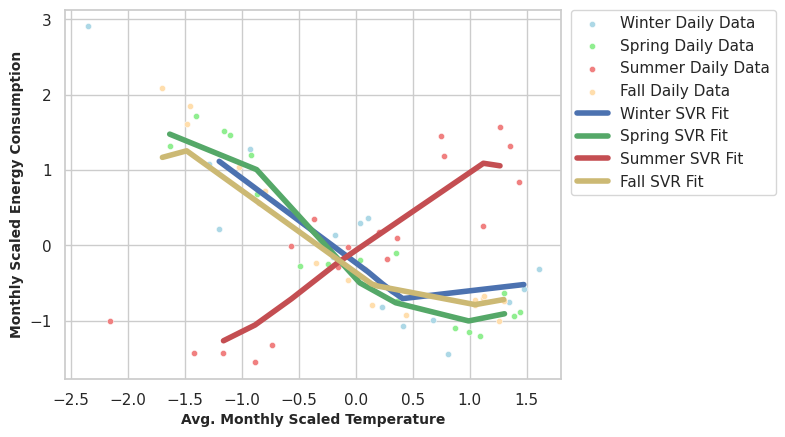

In [ ]:
# Plot ALL results
sns.set(style='whitegrid')
sns.scatterplot(x = hq_win_scaleddf['Temp'], y = hq_win_scaleddf['EnergyUse'], color='lightblue', s=20, label='Winter Daily Data')
sns.scatterplot(x = hq_spr_scaleddf['Temp'], y = hq_spr_scaleddf['EnergyUse'], color='lightgreen', s=20, label='Spring Daily Data')
sns.scatterplot(x = hq_sum_scaleddf['Temp'], y = hq_sum_scaleddf['EnergyUse'], color='lightcoral', s=20, label='Summer Daily Data')
sns.scatterplot(x = hq_fal_scaleddf['Temp'], y = hq_fal_scaleddf['EnergyUse'], color='navajowhite', s=20, label='Fall Daily Data')
plt.plot(plotsort_mon_win['x'], plotsort_mon_win['y'], color="b", linewidth=4, label='Winter SVR Fit')
plt.plot(plotsort_mon_spr['x'], plotsort_mon_spr['y'], color="g", linewidth=4, label='Spring SVR Fit')
plt.plot(plotsort_mon_sum['x'], plotsort_mon_sum['y'], color="r", linewidth=4, label='Summer SVR Fit')
plt.plot(plotsort_mon_fal['x'], plotsort_mon_fal['y'], color="y", linewidth=4, label='Fall SVR Fit')
plt.ylabel("Monthly Scaled Energy Consumption", fontweight ='bold', fontsize = 10)
plt.xlabel("Avg. Monthly Scaled Temperature", fontweight ='bold', fontsize = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

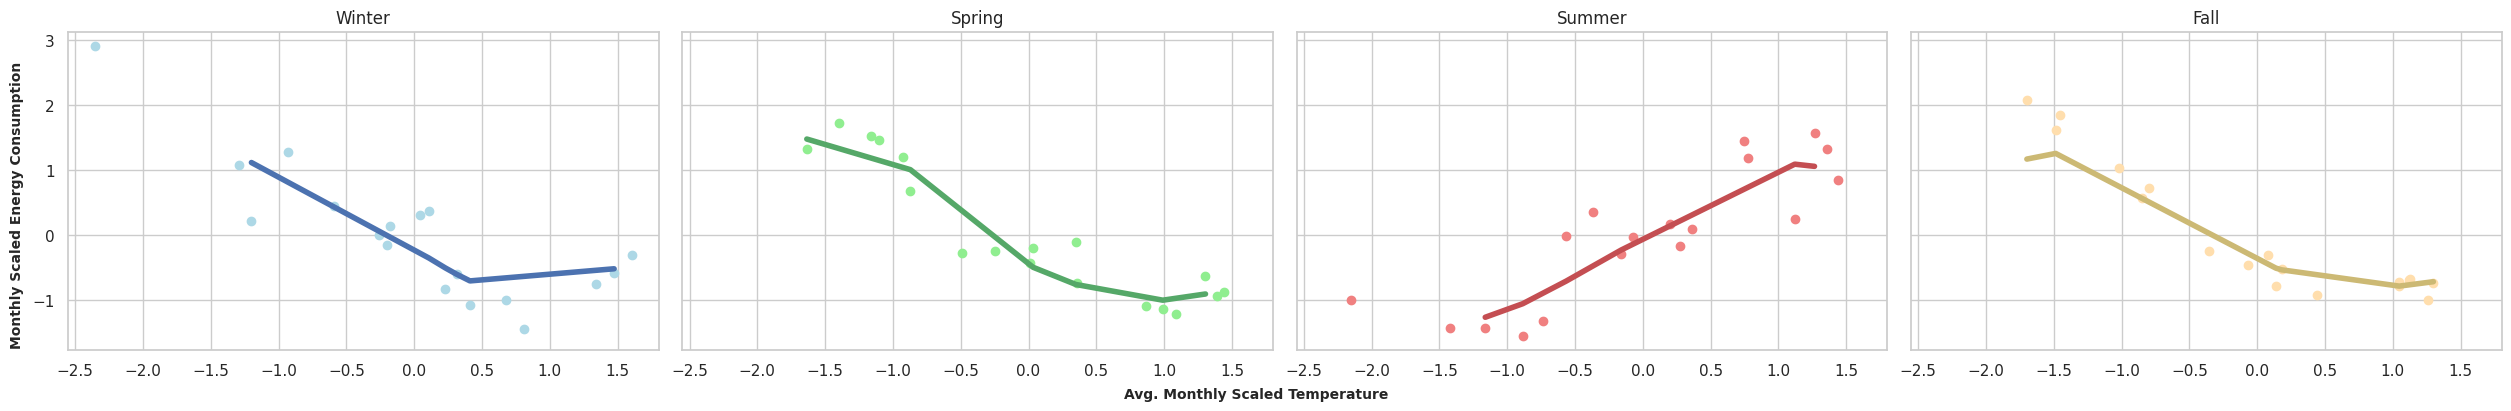

In [ ]:
# Side by side plot
# Plot it all together:
figure,  (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, constrained_layout=True, figsize=(25, 4))
ax1.plot(hq_win_scaleddf['Temp'], hq_win_scaleddf['EnergyUse'], color='lightblue', marker='o', linestyle='None', label='Winter Daily Data')
ax1.plot(plotsort_mon_win['x'], plotsort_mon_win['y'], color="b", linewidth=4, label='Winter SVR Fit')
ax1.set_title("Winter")
ax1.grid(True)

ax2.plot(hq_spr_scaleddf['Temp'], hq_spr_scaleddf['EnergyUse'], color='lightgreen', marker='o', linestyle='None', label='Spring Daily Data')
ax2.plot(plotsort_mon_spr['x'], plotsort_mon_spr['y'], color="g", linewidth=4, label='Spring SVR Fit')
ax2.set_title("Spring")
ax2.grid(True)

ax3.plot(hq_sum_scaleddf['Temp'], hq_sum_scaleddf['EnergyUse'], color='lightcoral', marker='o', linestyle='None', label='Summer Daily Data')
ax3.plot(plotsort_mon_sum['x'], plotsort_mon_sum['y'], color="r", linewidth=4, label='Summer SVR Fit')
ax3.set_title("Summer")
ax3.grid(True)

ax4.plot(hq_fal_scaleddf['Temp'], hq_fal_scaleddf['EnergyUse'], color='navajowhite', marker='o', linestyle='None', label='Fall Daily Data')
ax4.plot(plotsort_mon_fal['x'], plotsort_mon_fal['y'], color="y", linewidth=4, label='Fall SVR Fit')
ax4.set_title("Fall")
ax4.grid(True)

figure.supxlabel('Avg. Monthly Scaled Temperature', fontweight='bold', fontsize=10)
figure.supylabel('Monthly Scaled Energy Consumption', fontweight='bold', fontsize=10)
#figure.legend(custom_lines, ['Winter', 'Spring', 'Summer', 'Fall'], loc='lower right', ncol=4)
plt.show()

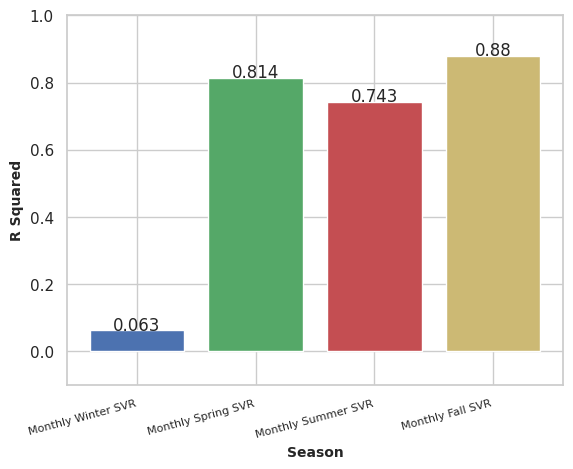

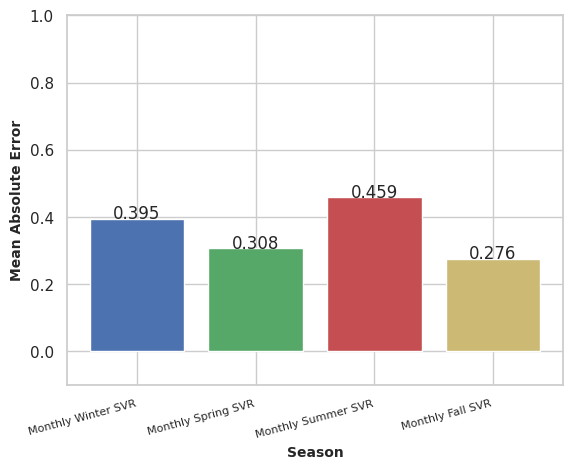

In [ ]:
# Create a bar-chart to demonstrate the difference in fit between each seasonal model
# Function to place labels at the center of each bar
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center

# First R2
plt.ylim(-0.1, 1)
bar_positions = np.arange(4)

label_m_svr_x_r2 = ['Monthly Winter', 'Monthly Spring', 'Monthly Summer', 'Monthly Fall']
label_m_svr_y_r2 = [svr_r2_m_win, svr_r2_m_spr, svr_r2_m_sum, svr_r2_m_fal]

plt.bar(bar_positions[0], svr_r2_m_win, color ='b', edgecolor ='w', label ='Winter SVR Monthly R2')
plt.bar(bar_positions[1], svr_r2_m_spr, color ='g', edgecolor ='w', label ='Spring SVR Monthly R2')
plt.bar(bar_positions[2], svr_r2_m_sum, color ='r', edgecolor ='w', label ='Summer SVR Monthly R2')
plt.bar(bar_positions[3], svr_r2_m_fal, color ='y', edgecolor ='w', label ='Fall SVR Monthly R2')
plt.xticks(bar_positions, ['Monthly Winter SVR', 'Monthly Spring SVR', 'Monthly Summer SVR', 'Monthly Fall SVR'], fontsize=8, rotation=15, ha='right')

add_labels(label_m_svr_x_r2, label_m_svr_y_r2)

plt.xlabel('Season', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

# Next MAE
plt.ylim(-0.1, 1)
bar_positions = np.arange(4)

label_m_svr_x_mae = ['Monthly Winter', 'Monthly Spring', 'Monthly Summer', 'Monthly Fall']
label_m_svr_y_mae = [svr_mae_m_win, svr_mae_m_spr, svr_mae_m_sum, svr_mae_m_fal]

plt.bar(bar_positions[0], svr_mae_m_win, color ='b', edgecolor ='w', label ='Winter SVR Monthly MAE')
plt.bar(bar_positions[1], svr_mae_m_spr, color ='g', edgecolor ='w', label ='Spring SVR Monthly MAE')
plt.bar(bar_positions[2], svr_mae_m_sum, color ='r', edgecolor ='w', label ='Summer SVR Monthly MAE')
plt.bar(bar_positions[3], svr_mae_m_fal, color ='y', edgecolor ='w', label ='Fall SVR Monthly MAE')
plt.xticks(bar_positions, ['Monthly Winter SVR', 'Monthly Spring SVR', 'Monthly Summer SVR', 'Monthly Fall SVR'], fontsize=8, rotation=15, ha='right')

add_labels(label_m_svr_x_mae, label_m_svr_y_mae)

plt.xlabel('Season', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()

# Building 1, SVR (Seasonal Energy Use, Daily)

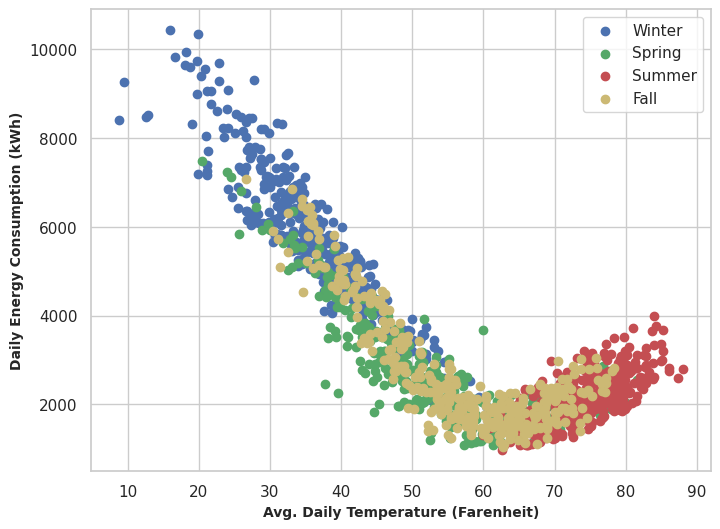

In [ ]:
# Plot DAILY to observe raw 2D data
plt.figure(figsize=(8, 6))
plt.scatter(b1_daily_winter['Temp'], b1_daily_winter['EnergyUse'], marker='o', color ='b', label ='Winter')
plt.scatter(b1_daily_spring['Temp'], b1_daily_spring['EnergyUse'], marker='o', color ='g', label ='Spring')
plt.scatter(b1_daily_summer['Temp'], b1_daily_summer['EnergyUse'], marker='o', color ='r', label ='Summer')
plt.scatter(b1_daily_fall['Temp'], b1_daily_fall['EnergyUse'], marker='o', color ='y', label ='Fall')
plt.xlabel('Avg. Daily Temperature (Farenheit)', fontweight ='bold', fontsize = 10)
plt.ylabel('Daily Energy Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

# Divide Variables (Winter, Spring, Summer, and Fall Seperately)
svr_win_x_d_df = np.array(b1_daily_winter['Temp'])
svr_win_x_d_df = svr_win_x_d_df.reshape(-1, 1)
svr_win_y_d_df = np.array(b1_daily_winter['EnergyUse'])
svr_win_y_d_df = svr_win_y_d_df.reshape(-1, 1)

svr_spr_x_d_df = np.array(b1_daily_spring['Temp'])
svr_spr_x_d_df = svr_spr_x_d_df.reshape(-1, 1)
svr_spr_y_d_df = np.array(b1_daily_spring['EnergyUse'])
svr_spr_y_d_df = svr_spr_y_d_df.reshape(-1, 1)

svr_sum_x_d_df = np.array(b1_daily_summer['Temp'])
svr_sum_x_d_df = svr_sum_x_d_df.reshape(-1, 1)
svr_sum_y_d_df = np.array(b1_daily_summer['EnergyUse'])
svr_sum_y_d_df = svr_sum_y_d_df.reshape(-1, 1)

svr_fal_x_d_df = np.array(b1_daily_fall['Temp'])
svr_fal_x_d_df = svr_fal_x_d_df.reshape(-1, 1)
svr_fal_y_d_df = np.array(b1_daily_fall['EnergyUse'])
svr_fal_y_d_df = svr_fal_y_d_df.reshape(-1, 1)

In [ ]:
# Winter:
X_d_win = sc_Xd.fit_transform(svr_win_x_d_df)
Y_d_win = sc_yd.fit_transform(svr_win_y_d_df)
hq_win_scaleddf = pd.DataFrame(np.hstack((X_d_win,Y_d_win)), columns=['Temp','EnergyUse'])
hq_win_scaleddf = hq_win_scaleddf.astype(float)

hq_win_scaledtemp = hq_win_scaleddf['Temp']
hq_win_scaledtemp = hq_win_scaledtemp.astype(float)
hq_win_scaledener = hq_win_scaleddf['EnergyUse']
hq_win_scaledener = hq_win_scaledener.astype(float)

# Split into training and testing (70% Train, 30% Test)
from sklearn.model_selection import train_test_split
X_win_d_train, X_win_d_eval, Y_win_d_train, Y_win_d_eval = train_test_split(X_d_win, Y_d_win, test_size=0.3, random_state=101)

# Create SVR with Radial Basis Function (RBF) kernal
svr_d_win = SVR(kernel='rbf')

# Train model with exisiting data
svr_d_win.fit(X_win_d_train, Y_win_d_train)

# Make predicitions on the data
y_pred_d_win = svr_d_win.predict(X_win_d_eval)
X_plot_d_win = pd.DataFrame(X_win_d_eval)
X_plot_d_win.columns=['x']
y_plot_d_win = pd.Series(y_pred_d_win, name='y')
plot_d_win = pd.concat([X_plot_d_win, y_plot_d_win], axis=1)
plotsort_d_win = plot_d_win.sort_values(by='x')

# Check performance of prediction
svr_r2_d_win = r2_score(Y_win_d_eval, y_pred_d_win)
svr_r2_d_win = round(svr_r2_d_win, 3)
print("R^2 Error in Winter Predicition: ")
print(svr_r2_d_win)

svr_mae_d_win = mean_absolute_error(Y_win_d_eval, y_pred_d_win)
svr_mae_d_win = round(svr_mae_d_win, 3)
print("MAE Error in Winter Predicition: ")
print(svr_mae_d_win)

# Spring:
X_d_spr = sc_Xd.fit_transform(svr_spr_x_d_df)
Y_d_spr = sc_yd.fit_transform(svr_spr_y_d_df)
hq_spr_scaleddf = pd.DataFrame(np.hstack((X_d_spr,Y_d_spr)), columns=['Temp','EnergyUse'])
hq_spr_scaleddf = hq_spr_scaleddf.astype(float)

hq_spr_scaledtemp = hq_spr_scaleddf['Temp']
hq_spr_scaledtemp = hq_spr_scaledtemp.astype(float)
hq_spr_scaledener = hq_spr_scaleddf['EnergyUse']
hq_spr_scaledener = hq_spr_scaledener.astype(float)

# Split into training and testing (70% Train, 30% Test)
X_spr_d_train, X_spr_d_eval, Y_spr_d_train, Y_spr_d_eval = train_test_split(X_d_spr, Y_d_spr, test_size=0.3, random_state=101)

# Create SVR with Radial Basis Function (RBF) kernel
svr_d_spr = SVR(kernel='rbf')

# Train model with exisiting data
svr_d_spr.fit(X_spr_d_train, Y_spr_d_train)

# Make predicitions on the data
y_pred_d_spr = svr_d_spr.predict(X_spr_d_eval)
X_plot_d_spr = pd.DataFrame(X_spr_d_eval)
X_plot_d_spr.columns=['x']
y_plot_d_spr = pd.Series(y_pred_d_spr, name='y')
plot_d_spr = pd.concat([X_plot_d_spr, y_plot_d_spr], axis=1)
plotsort_d_spr = plot_d_spr.sort_values(by='x')

# Check performance of prediction
svr_r2_d_spr = r2_score(Y_spr_d_eval, y_pred_d_spr)
svr_r2_d_spr = round(svr_r2_d_spr, 3)
print("R^2 Error in Spring Predicition: ")
print(svr_r2_d_spr)

svr_mae_d_spr = mean_absolute_error(Y_spr_d_eval, y_pred_d_spr)
svr_mae_d_spr = round(svr_mae_d_spr, 3)
print("MAE Error in Spring Predicition: ")
print(svr_mae_d_spr)

# Summer:
X_d_sum = sc_Xd.fit_transform(svr_sum_x_d_df)
Y_d_sum = sc_yd.fit_transform(svr_sum_y_d_df)
hq_sum_scaleddf = pd.DataFrame(np.hstack((X_d_sum,Y_d_sum)), columns=['Temp','EnergyUse'])
hq_sum_scaleddf = hq_sum_scaleddf.astype(float)

hq_sum_scaledtemp = hq_sum_scaleddf['Temp']
hq_sum_scaledtemp = hq_sum_scaledtemp.astype(float)
hq_sum_scaledener = hq_sum_scaleddf['EnergyUse']
hq_sum_scaledener = hq_sum_scaledener

# Split into training and testing (70% Train, 30% Test)
X_sum_d_train, X_sum_d_eval, Y_sum_d_train, Y_sum_d_eval = train_test_split(X_d_sum, Y_d_sum, test_size=0.3, random_state=101)

# Create SVR with Radial Basis Function (RBF) kernel
svr_d_sum = SVR(kernel='rbf')

# Train model with exisiting data
svr_d_sum.fit(X_sum_d_train, Y_sum_d_train)

# Make predicitions on the data
y_pred_d_sum = svr_d_sum.predict(X_sum_d_eval)
X_plot_d_sum = pd.DataFrame(X_sum_d_eval)
X_plot_d_sum.columns=['x']
y_plot_d_sum = pd.Series(y_pred_d_sum, name='y')
plot_d_sum = pd.concat([X_plot_d_sum, y_plot_d_sum], axis=1)
plotsort_d_sum = plot_d_sum.sort_values(by='x')

# Check performance of prediction
svr_r2_d_sum = r2_score(Y_sum_d_eval, y_pred_d_sum)
svr_r2_d_sum = round(svr_r2_d_sum, 3)
print("R^2 Error in Summer Predicition: ")
print(svr_r2_d_sum)

svr_mae_d_sum = mean_absolute_error(Y_sum_d_eval, y_pred_d_sum)
svr_mae_d_sum = round(svr_mae_d_sum, 3)
print("MAE Error in Summer Predicition: ")
print(svr_mae_d_sum)

# Fall:
X_d_fal = sc_Xd.fit_transform(svr_fal_x_d_df)
Y_d_fal = sc_yd.fit_transform(svr_fal_y_d_df)
hq_fal_scaleddf = pd.DataFrame(np.hstack((X_d_fal,Y_d_fal)), columns=['Temp','EnergyUse'])
hq_fal_scaleddf = hq_fal_scaleddf.astype(float)

hq_fal_scaledtemp = hq_fal_scaleddf['Temp']
hq_fal_scaledtemp = hq_fal_scaledtemp.astype(float)
hq_fal_scaledener = hq_fal_scaleddf['EnergyUse']
hq_fal_scaledener = hq_fal_scaledener

# Split into training and testing (70% Train, 30% Test)
X_fal_d_train, X_fal_d_eval, Y_fal_d_train, Y_fal_d_eval = train_test_split(X_d_fal, Y_d_fal, test_size=0.3, random_state=101)

# Create SVR with Radial Basis Function (RBF) kernel
svr_d_fal = SVR(kernel='rbf')

# Train model with exisiting data
svr_d_fal.fit(X_fal_d_train, Y_fal_d_train)

# Make predicitions on the data
y_pred_d_fal = svr_d_fal.predict(X_fal_d_eval)
X_plot_d_fal = pd.DataFrame(X_fal_d_eval)
X_plot_d_fal.columns=['x']
y_plot_d_fal = pd.Series(y_pred_d_fal, name='y')
plot_d_fal = pd.concat([X_plot_d_fal, y_plot_d_fal], axis=1)
plotsort_d_fal = plot_d_fal.sort_values(by='x')

# Check performance of prediction
svr_r2_d_fal = r2_score(Y_fal_d_eval, y_pred_d_fal)
svr_r2_d_fal = round(svr_r2_d_fal, 3)
print("R^2 Error in Fall Predicition: ")
print(svr_r2_d_fal)

svr_mae_d_fal = mean_absolute_error(Y_fal_d_eval, y_pred_d_fal)
svr_mae_d_fal = round(svr_mae_d_fal, 3)
print("MAE Error in Fall Predicition: ")
print(svr_mae_d_fal)

R^2 Error in Winter Predicition: 
0.821
MAE Error in Winter Predicition: 
0.315
R^2 Error in Spring Predicition: 
0.864
MAE Error in Spring Predicition: 
0.261
R^2 Error in Summer Predicition: 
0.311
MAE Error in Summer Predicition: 
0.617
R^2 Error in Fall Predicition: 
0.919
MAE Error in Fall Predicition: 
0.237


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

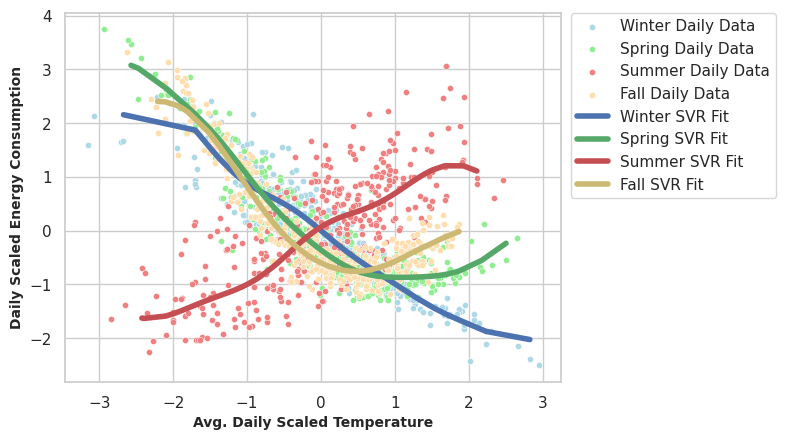

In [ ]:
# Plot ALL results
sns.set(style='whitegrid')
sns.scatterplot(x = hq_win_scaleddf['Temp'], y = hq_win_scaleddf['EnergyUse'], color='lightblue', s=20, label='Winter Daily Data')
sns.scatterplot(x = hq_spr_scaleddf['Temp'], y = hq_spr_scaleddf['EnergyUse'], color='lightgreen', s=20, label='Spring Daily Data')
sns.scatterplot(x = hq_sum_scaleddf['Temp'], y = hq_sum_scaleddf['EnergyUse'], color='lightcoral', s=20, label='Summer Daily Data')
sns.scatterplot(x = hq_fal_scaleddf['Temp'], y = hq_fal_scaleddf['EnergyUse'], color='navajowhite', s=20, label='Fall Daily Data')
plt.plot(plotsort_d_win['x'], plotsort_d_win['y'], color="b", linewidth=4, label='Winter SVR Fit')
plt.plot(plotsort_d_spr['x'], plotsort_d_spr['y'], color="g", linewidth=4, label='Spring SVR Fit')
plt.plot(plotsort_d_sum['x'], plotsort_d_sum['y'], color="r", linewidth=4, label='Summer SVR Fit')
plt.plot(plotsort_d_fal['x'], plotsort_d_fal['y'], color="y", linewidth=4, label='Fall SVR Fit')
plt.ylabel("Daily Scaled Energy Consumption", fontweight ='bold', fontsize = 10)
plt.xlabel("Avg. Daily Scaled Temperature", fontweight ='bold', fontsize = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

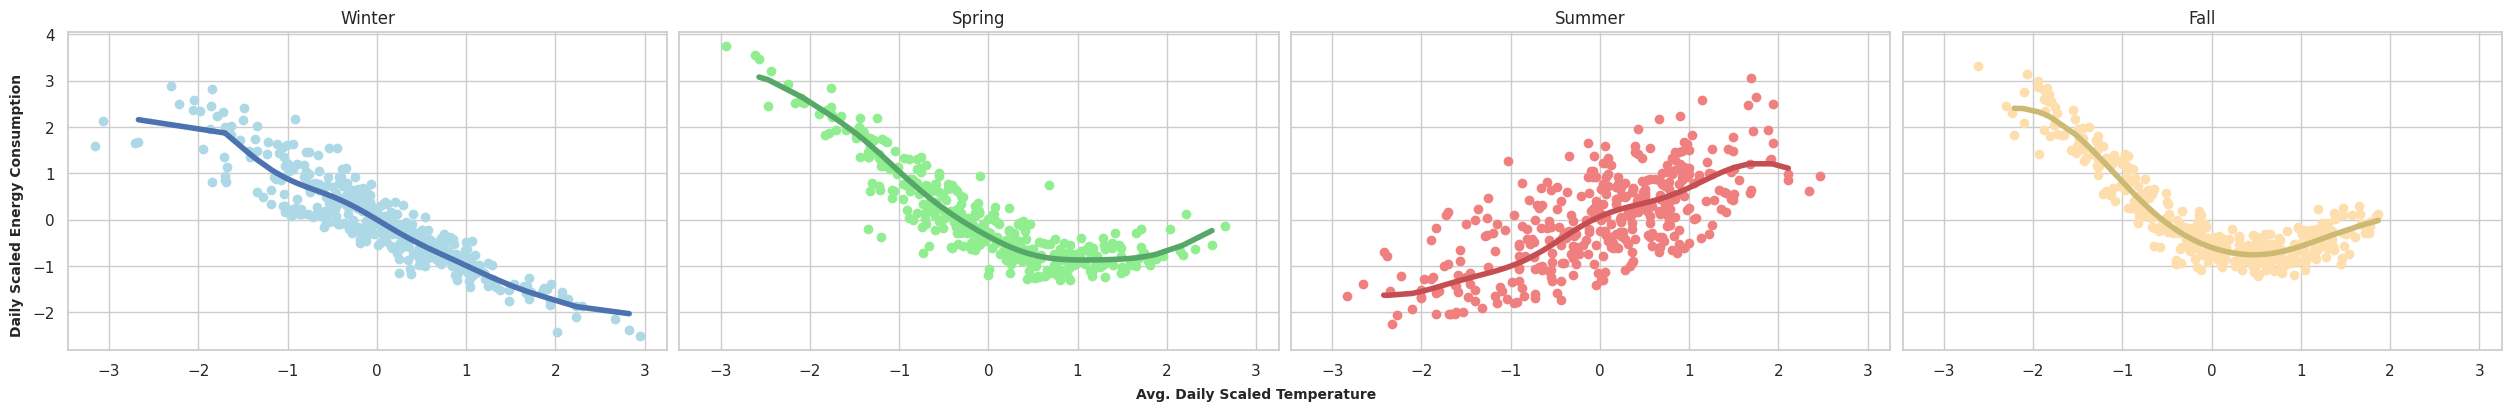

In [ ]:
# Side by side plot
# Plot it all together:
figure,  (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, constrained_layout=True, figsize=(25, 4))
ax1.plot(hq_win_scaleddf['Temp'], hq_win_scaleddf['EnergyUse'], color='lightblue', marker='o', linestyle='None', label='Winter Daily Data')
ax1.plot(plotsort_d_win['x'], plotsort_d_win['y'], color="b", linewidth=4, label='Winter SVR Fit')
ax1.set_title("Winter")
ax1.grid(True)

ax2.plot(hq_spr_scaleddf['Temp'], hq_spr_scaleddf['EnergyUse'], color='lightgreen', marker='o', linestyle='None', label='Spring Daily Data')
ax2.plot(plotsort_d_spr['x'], plotsort_d_spr['y'], color="g", linewidth=4, label='Spring SVR Fit')
ax2.set_title("Spring")
ax2.grid(True)

ax3.plot(hq_sum_scaleddf['Temp'], hq_sum_scaleddf['EnergyUse'], color='lightcoral', marker='o', linestyle='None', label='Summer Daily Data')
ax3.plot(plotsort_d_sum['x'], plotsort_d_sum['y'], color="r", linewidth=4, label='Summer SVR Fit')
ax3.set_title("Summer")
ax3.grid(True)

ax4.plot(hq_fal_scaleddf['Temp'], hq_fal_scaleddf['EnergyUse'], color='navajowhite', marker='o', linestyle='None', label='Fall Daily Data')
ax4.plot(plotsort_d_fal['x'], plotsort_d_fal['y'], color="y", linewidth=4, label='Fall SVR Fit')
ax4.set_title("Fall")
ax4.grid(True)

figure.supxlabel('Avg. Daily Scaled Temperature', fontweight='bold', fontsize=10)
figure.supylabel('Daily Scaled Energy Consumption', fontweight='bold', fontsize=10)
#figure.legend(custom_lines, ['Winter', 'Spring', 'Summer', 'Fall'], loc='lower right', ncol=4)
plt.show()

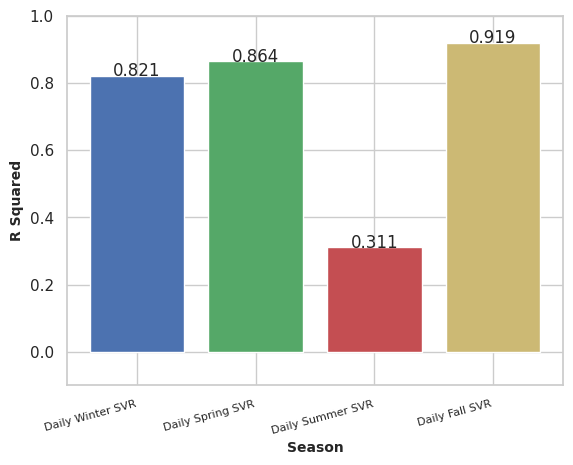

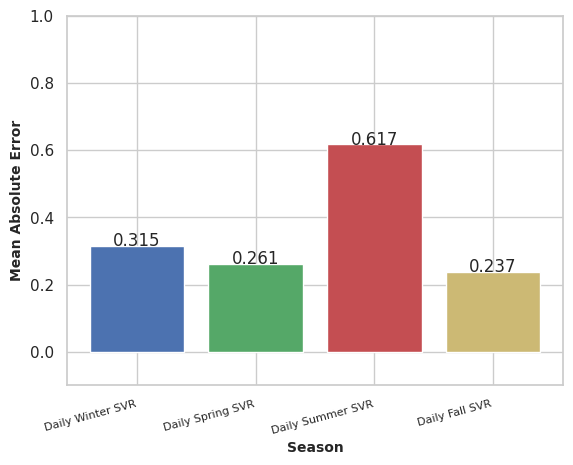

In [ ]:
# Create a bar-chart to demonstrate the difference in fit between each seasonal model
# Function to place labels at the center of each bar
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center

# First R2
plt.ylim(-0.1, 1)
bar_positions = np.arange(4)

label_d_svr_x_r2 = ['Daily Winter', 'Daily Spring', 'Daily Summer', 'Daily Fall']
label_d_svr_y_r2 = [svr_r2_d_win, svr_r2_d_spr, svr_r2_d_sum, svr_r2_d_fal]

plt.bar(bar_positions[0], svr_r2_d_win, color ='b', edgecolor ='w', label ='Winter SVR Daily R2')
plt.bar(bar_positions[1], svr_r2_d_spr, color ='g', edgecolor ='w', label ='Spring SVR Daily R2')
plt.bar(bar_positions[2], svr_r2_d_sum, color ='r', edgecolor ='w', label ='Summer SVR Daily R2')
plt.bar(bar_positions[3], svr_r2_d_fal, color ='y', edgecolor ='w', label ='Fall SVR Daily R2')
plt.xticks(bar_positions, ['Daily Winter SVR', 'Daily Spring SVR', 'Daily Summer SVR', 'Daily Fall SVR'], fontsize=8, rotation=15, ha='right')

add_labels(label_d_svr_x_r2, label_d_svr_y_r2)

plt.xlabel('Season', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

# Next MAE
plt.ylim(-0.1, 1)
bar_positions = np.arange(4)

label_d_svr_x_mae = ['Daily Winter', 'Daily Spring', 'Daily Summer', 'Daily Fall']
label_d_svr_y_mae = [svr_mae_d_win, svr_mae_d_spr, svr_mae_d_sum, svr_mae_d_fal]

plt.bar(bar_positions[0], svr_mae_d_win, color ='b', edgecolor ='w', label ='Winter SVR Daily MAE')
plt.bar(bar_positions[1], svr_mae_d_spr, color ='g', edgecolor ='w', label ='Spring SVR Daily MAE')
plt.bar(bar_positions[2], svr_mae_d_sum, color ='r', edgecolor ='w', label ='Summer SVR Daily MAE')
plt.bar(bar_positions[3], svr_mae_d_fal, color ='y', edgecolor ='w', label ='Fall SVR Daily MAE')
plt.xticks(bar_positions, ['Daily Winter SVR', 'Daily Spring SVR', 'Daily Summer SVR', 'Daily Fall SVR'], fontsize=8, rotation=15, ha='right')

add_labels(label_d_svr_x_mae, label_d_svr_y_mae)

plt.xlabel('Season', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()

# Building 1, SVR (Seasonal Energy Use, Hourly)

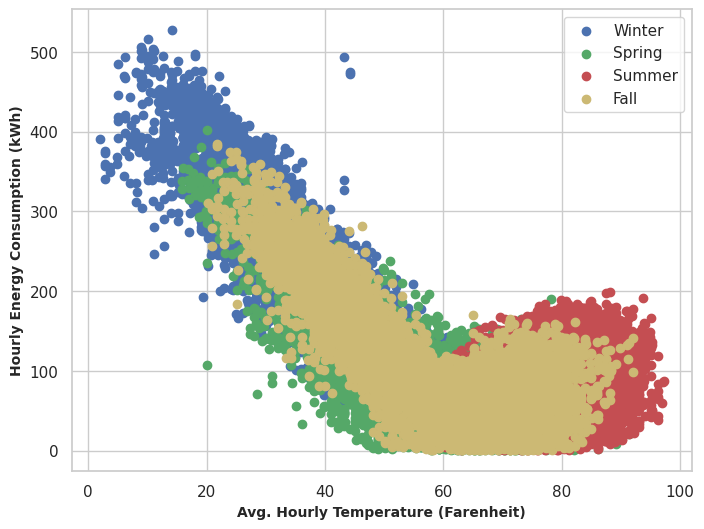

In [ ]:
# Plot HOURLY to observe raw 2D data
plt.figure(figsize=(8, 6))
plt.scatter(b1_hourly_winter['Temp'], b1_hourly_winter['EnergyUse'], marker='o', color ='b', label ='Winter')
plt.scatter(b1_hourly_spring['Temp'], b1_hourly_spring['EnergyUse'], marker='o', color ='g', label ='Spring')
plt.scatter(b1_hourly_summer['Temp'], b1_hourly_summer['EnergyUse'], marker='o', color ='r', label ='Summer')
plt.scatter(b1_hourly_fall['Temp'], b1_hourly_fall['EnergyUse'], marker='o', color ='y', label ='Fall')
plt.xlabel('Avg. Hourly Temperature (Farenheit)', fontweight ='bold', fontsize = 10)
plt.ylabel('Hourly Energy Consumption (kWh)', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

# Divide Variables (Winter, Spring, Summer, and Fall Seperately)
svr_win_x_h_df = np.array(b1_hourly_winter['Temp'])
svr_win_x_h_df = svr_win_x_h_df.reshape(-1, 1)
svr_win_y_h_df = np.array(b1_hourly_winter['EnergyUse'])
svr_win_y_h_df = svr_win_y_h_df.reshape(-1, 1)

svr_spr_x_h_df = np.array(b1_hourly_spring['Temp'])
svr_spr_x_h_df = svr_spr_x_h_df.reshape(-1, 1)
svr_spr_y_h_df = np.array(b1_hourly_spring['EnergyUse'])
svr_spr_y_h_df = svr_spr_y_h_df.reshape(-1, 1)

svr_sum_x_h_df = np.array(b1_hourly_summer['Temp'])
svr_sum_x_h_df = svr_sum_x_h_df.reshape(-1, 1)
svr_sum_y_h_df = np.array(b1_hourly_summer['EnergyUse'])
svr_sum_y_h_df = svr_sum_y_h_df.reshape(-1, 1)

svr_fal_x_h_df = np.array(b1_hourly_fall['Temp'])
svr_fal_x_h_df = svr_fal_x_h_df.reshape(-1, 1)
svr_fal_y_h_df = np.array(b1_hourly_fall['EnergyUse'])
svr_fal_y_h_df = svr_fal_y_h_df.reshape(-1, 1)

In [ ]:
# Winter:
X_h_win = sc_Xd.fit_transform(svr_win_x_h_df)
Y_h_win = sc_yd.fit_transform(svr_win_y_h_df)
hq_win_scaleddf = pd.DataFrame(np.hstack((X_h_win,Y_h_win)), columns=['Temp','EnergyUse'])
hq_win_scaleddf = hq_win_scaleddf.astype(float)

hq_win_scaledtemp = hq_win_scaleddf['Temp']
hq_win_scaledtemp = hq_win_scaledtemp.astype(float)
hq_win_scaledener = hq_win_scaleddf['EnergyUse']
hq_win_scaledener = hq_win_scaledener.astype(float)

# Split into training and testing (70% Train, 30% Test)
from sklearn.model_selection import train_test_split
X_win_h_train, X_win_h_eval, Y_win_h_train, Y_win_h_eval = train_test_split(X_h_win, Y_h_win, test_size=0.3, random_state=101)

# Create SVR with Radial Basis Function (RBF) kernal
svr_h_win = SVR(kernel='rbf')

# Train model with exisiting data
svr_h_win.fit(X_win_h_train, Y_win_h_train)

# Make predicitions on the data
y_pred_h_win = svr_h_win.predict(X_win_h_eval)
X_plot_h_win = pd.DataFrame(X_win_h_eval)
X_plot_h_win.columns=['x']
y_plot_h_win = pd.Series(y_pred_h_win, name='y')
plot_h_win = pd.concat([X_plot_h_win, y_plot_h_win], axis=1)
plotsort_h_win = plot_h_win.sort_values(by='x')

# Check performance of prediction
svr_r2_h_win = r2_score(Y_win_h_eval, y_pred_h_win)
svr_r2_h_win = round(svr_r2_h_win, 3)
print("R^2 Error in Winter Predicition: ")
print(svr_r2_h_win)

svr_mae_h_win = mean_absolute_error(Y_win_h_eval, y_pred_h_win)
svr_mae_h_win = round(svr_mae_h_win, 3)
print("MAE Error in Winter Predicition: ")
print(svr_mae_h_win)

# Spring:
X_h_spr = sc_Xd.fit_transform(svr_spr_x_h_df)
Y_h_spr = sc_yd.fit_transform(svr_spr_y_h_df)
hq_spr_scaleddf = pd.DataFrame(np.hstack((X_h_spr,Y_h_spr)), columns=['Temp','EnergyUse'])
hq_spr_scaleddf = hq_spr_scaleddf.astype(float)

hq_spr_scaledtemp = hq_spr_scaleddf['Temp']
hq_spr_scaledtemp = hq_spr_scaledtemp.astype(float)
hq_spr_scaledener = hq_spr_scaleddf['EnergyUse']
hq_spr_scaledener = hq_spr_scaledener.astype(float)

# Split into training and testing (70% Train, 30% Test)
X_spr_h_train, X_spr_h_eval, Y_spr_h_train, Y_spr_h_eval = train_test_split(X_h_spr, Y_h_spr, test_size=0.3, random_state=101)

# Create SVR with Radial Basis Function (RBF) kernel
svr_h_spr = SVR(kernel='rbf')

# Train model with exisiting data
svr_h_spr.fit(X_spr_h_train, Y_spr_h_train)

# Make predicitions on the data
y_pred_h_spr = svr_h_spr.predict(X_spr_h_eval)
X_plot_h_spr = pd.DataFrame(X_spr_h_eval)
X_plot_h_spr.columns=['x']
y_plot_h_spr = pd.Series(y_pred_h_spr, name='y')
plot_h_spr = pd.concat([X_plot_h_spr, y_plot_h_spr], axis=1)
plotsort_h_spr = plot_h_spr.sort_values(by='x')

# Check performance of prediction
svr_r2_h_spr = r2_score(Y_spr_h_eval, y_pred_h_spr)
svr_r2_h_spr = round(svr_r2_h_spr, 3)
print("R^2 Error in Spring Predicition: ")
print(svr_r2_h_spr)

svr_mae_h_spr = mean_absolute_error(Y_spr_h_eval, y_pred_h_spr)
svr_mae_h_spr = round(svr_mae_h_spr, 3)
print("MAE Error in Spring Predicition: ")
print(svr_mae_h_spr)

# Summer:
X_h_sum = sc_Xd.fit_transform(svr_sum_x_h_df)
Y_h_sum = sc_yd.fit_transform(svr_sum_y_h_df)
hq_sum_scaleddf = pd.DataFrame(np.hstack((X_h_sum,Y_h_sum)), columns=['Temp','EnergyUse'])
hq_sum_scaleddf = hq_sum_scaleddf.astype(float)

hq_sum_scaledtemp = hq_sum_scaleddf['Temp']
hq_sum_scaledtemp = hq_sum_scaledtemp.astype(float)
hq_sum_scaledener = hq_sum_scaleddf['EnergyUse']
hq_sum_scaledener = hq_sum_scaledener

# Split into training and testing (70% Train, 30% Test)
X_sum_h_train, X_sum_h_eval, Y_sum_h_train, Y_sum_h_eval = train_test_split(X_h_sum, Y_h_sum, test_size=0.3, random_state=101)

# Create SVR with Radial Basis Function (RBF) kernel
svr_h_sum = SVR(kernel='rbf')

# Train model with exisiting data
svr_h_sum.fit(X_sum_h_train, Y_sum_h_train)

# Make predicitions on the data
y_pred_h_sum = svr_h_sum.predict(X_sum_h_eval)
X_plot_h_sum = pd.DataFrame(X_sum_h_eval)
X_plot_h_sum.columns=['x']
y_plot_h_sum = pd.Series(y_pred_h_sum, name='y')
plot_h_sum = pd.concat([X_plot_h_sum, y_plot_h_sum], axis=1)
plotsort_h_sum = plot_h_sum.sort_values(by='x')

# Check performance of prediction
svr_r2_h_sum = r2_score(Y_sum_h_eval, y_pred_h_sum)
svr_r2_h_sum = round(svr_r2_h_sum, 3)
print("R^2 Error in Summer Predicition: ")
print(svr_r2_h_sum)

svr_mae_h_sum = mean_absolute_error(Y_sum_h_eval, y_pred_h_sum)
svr_mae_h_sum = round(svr_mae_h_sum, 3)
print("MAE Error in Summer Predicition: ")
print(svr_mae_h_sum)

# Fall:
X_h_fal = sc_Xd.fit_transform(svr_fal_x_h_df)
Y_h_fal = sc_yd.fit_transform(svr_fal_y_h_df)
hq_fal_scaleddf = pd.DataFrame(np.hstack((X_h_fal,Y_h_fal)), columns=['Temp','EnergyUse'])
hq_fal_scaleddf = hq_fal_scaleddf.astype(float)

hq_fal_scaledtemp = hq_fal_scaleddf['Temp']
hq_fal_scaledtemp = hq_fal_scaledtemp.astype(float)
hq_fal_scaledener = hq_fal_scaleddf['EnergyUse']
hq_fal_scaledener = hq_fal_scaledener

# Split into training and testing (70% Train, 30% Test)
X_fal_h_train, X_fal_h_eval, Y_fal_h_train, Y_fal_h_eval = train_test_split(X_h_fal, Y_h_fal, test_size=0.3, random_state=101)

# Create SVR with Radial Basis Function (RBF) kernel
svr_h_fal = SVR(kernel='rbf')

# Train model with exisiting data
svr_h_fal.fit(X_fal_h_train, Y_fal_h_train)

# Make predicitions on the data
y_pred_h_fal = svr_h_fal.predict(X_fal_h_eval)
X_plot_h_fal = pd.DataFrame(X_fal_h_eval)
X_plot_h_fal.columns=['x']
y_plot_h_fal = pd.Series(y_pred_h_fal, name='y')
plot_h_fal = pd.concat([X_plot_h_fal, y_plot_h_fal], axis=1)
plotsort_h_fal = plot_h_fal.sort_values(by='x')

# Check performance of prediction
svr_r2_h_fal = r2_score(Y_fal_h_eval, y_pred_h_fal)
svr_r2_h_fal = round(svr_r2_h_fal, 3)
print("R^2 Error in Fall Predicition: ")
print(svr_r2_h_fal)

svr_mae_h_fal = mean_absolute_error(Y_fal_h_eval, y_pred_h_fal)
svr_mae_h_fal = round(svr_mae_h_fal, 3)
print("MAE Error in Fall Predicition: ")
print(svr_mae_h_fal)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 Error in Winter Predicition: 
0.746
MAE Error in Winter Predicition: 
0.388


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 Error in Spring Predicition: 
0.725
MAE Error in Spring Predicition: 
0.398


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 Error in Summer Predicition: 
-0.006
MAE Error in Summer Predicition: 
0.737


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R^2 Error in Fall Predicition: 
0.77
MAE Error in Fall Predicition: 
0.369


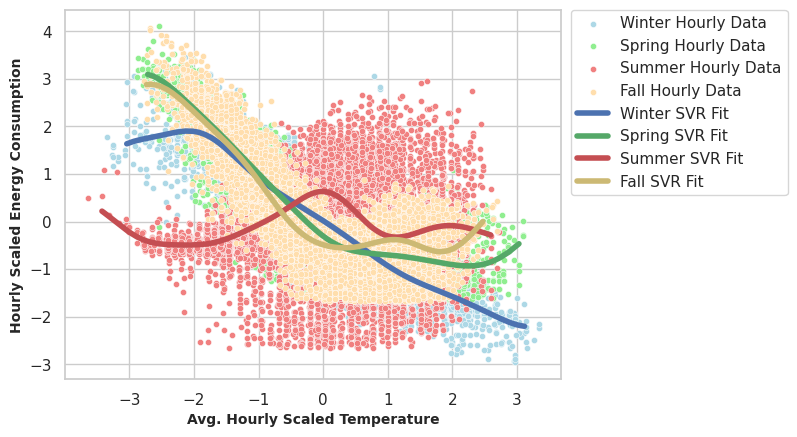

In [ ]:
# Plot ALL results
sns.set(style='whitegrid')
sns.scatterplot(x = hq_win_scaleddf['Temp'], y = hq_win_scaleddf['EnergyUse'], color='lightblue', s=20, label='Winter Hourly Data')
sns.scatterplot(x = hq_spr_scaleddf['Temp'], y = hq_spr_scaleddf['EnergyUse'], color='lightgreen', s=20, label='Spring Hourly Data')
sns.scatterplot(x = hq_sum_scaleddf['Temp'], y = hq_sum_scaleddf['EnergyUse'], color='lightcoral', s=20, label='Summer Hourly Data')
sns.scatterplot(x = hq_fal_scaleddf['Temp'], y = hq_fal_scaleddf['EnergyUse'], color='navajowhite', s=20, label='Fall Hourly Data')
plt.plot(plotsort_h_win['x'], plotsort_h_win['y'], color="b", linewidth=4, label='Winter SVR Fit')
plt.plot(plotsort_h_spr['x'], plotsort_h_spr['y'], color="g", linewidth=4, label='Spring SVR Fit')
plt.plot(plotsort_h_sum['x'], plotsort_h_sum['y'], color="r", linewidth=4, label='Summer SVR Fit')
plt.plot(plotsort_h_fal['x'], plotsort_h_fal['y'], color="y", linewidth=4, label='Fall SVR Fit')
plt.ylabel("Hourly Scaled Energy Consumption", fontweight ='bold', fontsize = 10)
plt.xlabel("Avg. Hourly Scaled Temperature", fontweight ='bold', fontsize = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

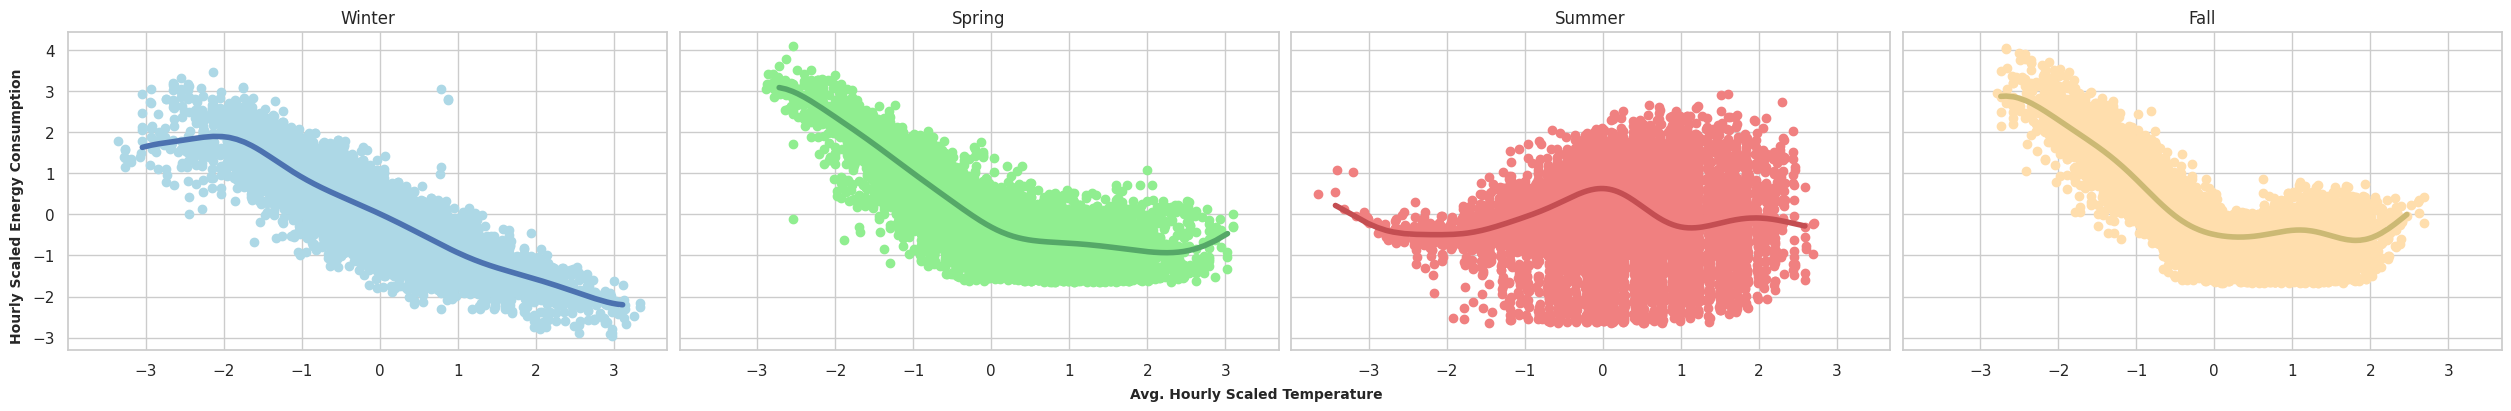

In [ ]:
# Side by side plot
# Plot it all together:
figure,  (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, constrained_layout=True, figsize=(25, 4))
ax1.plot(hq_win_scaleddf['Temp'], hq_win_scaleddf['EnergyUse'], color='lightblue', marker='o', linestyle='None', label='Winter Hourly Data')
ax1.plot(plotsort_h_win['x'], plotsort_h_win['y'], color="b", linewidth=4, label='Winter SVR Fit')
ax1.set_title("Winter")
ax1.grid(True)

ax2.plot(hq_spr_scaleddf['Temp'], hq_spr_scaleddf['EnergyUse'], color='lightgreen', marker='o', linestyle='None', label='Spring Hourly Data')
ax2.plot(plotsort_h_spr['x'], plotsort_h_spr['y'], color="g", linewidth=4, label='Spring SVR Fit')
ax2.set_title("Spring")
ax2.grid(True)

ax3.plot(hq_sum_scaleddf['Temp'], hq_sum_scaleddf['EnergyUse'], color='lightcoral', marker='o', linestyle='None', label='Summer Hourly Data')
ax3.plot(plotsort_h_sum['x'], plotsort_h_sum['y'], color="r", linewidth=4, label='Summer SVR Fit')
ax3.set_title("Summer")
ax3.grid(True)

ax4.plot(hq_fal_scaleddf['Temp'], hq_fal_scaleddf['EnergyUse'], color='navajowhite', marker='o', linestyle='None', label='Fall Hourly Data')
ax4.plot(plotsort_h_fal['x'], plotsort_h_fal['y'], color="y", linewidth=4, label='Fall SVR Fit')
ax4.set_title("Fall")
ax4.grid(True)

figure.supxlabel('Avg. Hourly Scaled Temperature', fontweight='bold', fontsize=10)
figure.supylabel('Hourly Scaled Energy Consumption', fontweight='bold', fontsize=10)
#figure.legend(custom_lines, ['Winter', 'Spring', 'Summer', 'Fall'], loc='lower right', ncol=4)
plt.show()

In [ ]:
# Create a bar-chart to demonstrate the difference in fit between each seasonal model
plt.ylim(-0.1, 1)
bar_positions = np.arange(4)

plt.bar(bar_positions[0], svr_r2_h_win, color ='b', edgecolor ='w', label ='Winter SVR Hourly R2')
plt.bar(bar_positions[1], svr_r2_h_spr, color ='g', edgecolor ='w', label ='Spring SVR Hourly R2')
plt.bar(bar_positions[2], svr_r2_h_sum, color ='r', edgecolor ='w', label ='Summer SVR Hourly R2')
plt.bar(bar_positions[3], svr_r2_h_fal, color ='y', edgecolor ='w', label ='Fall SVR Hourly R2')
plt.xticks(bar_positions, ['Winter SVR', 'Spring SVR', 'Summer SVR', 'Fall SVR'])

plt.xlabel('Season', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)

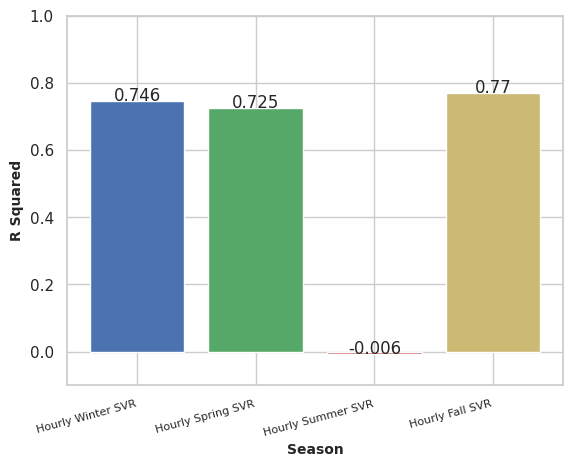

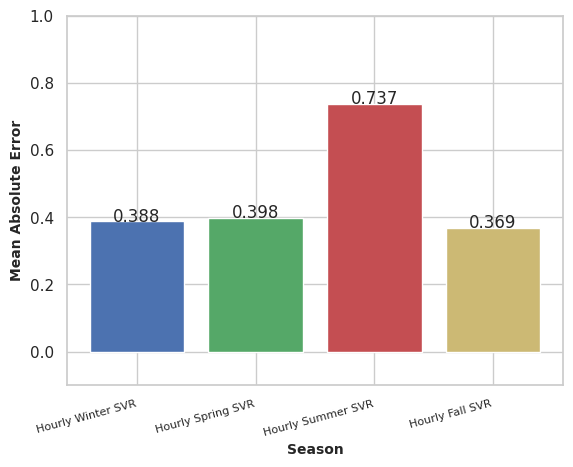

In [ ]:
# Create a bar-chart to demonstrate the difference in fit between each seasonal model
# Function to place labels at the center of each bar
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center

# First R2
plt.ylim(-0.1, 1)
bar_positions = np.arange(4)

label_h_svr_x_r2 = ['Hourly Winter', 'Hourly Spring', 'Hourly Summer', 'Hourly Fall']
label_h_svr_y_r2 = [svr_r2_h_win, svr_r2_h_spr, svr_r2_h_sum, svr_r2_h_fal]

plt.bar(bar_positions[0], svr_r2_h_win, color ='b', edgecolor ='w', label ='Winter SVR Hourly R2')
plt.bar(bar_positions[1], svr_r2_h_spr, color ='g', edgecolor ='w', label ='Spring SVR Hourly R2')
plt.bar(bar_positions[2], svr_r2_h_sum, color ='r', edgecolor ='w', label ='Summer SVR Hourly R2')
plt.bar(bar_positions[3], svr_r2_h_fal, color ='y', edgecolor ='w', label ='Fall SVR Hourly R2')
plt.xticks(bar_positions, ['Hourly Winter SVR', 'Hourly Spring SVR', 'Hourly Summer SVR', 'Hourly Fall SVR'], fontsize=8, rotation=15, ha='right')

add_labels(label_h_svr_x_r2, label_h_svr_y_r2)

plt.xlabel('Season', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

# Next MAE
plt.ylim(-0.1, 1)
bar_positions = np.arange(4)

label_h_svr_x_mae = ['Hourly Winter', 'Hourly Spring', 'Hourly Summer', 'Hourly Fall']
label_h_svr_y_mae = [svr_mae_h_win, svr_mae_h_spr, svr_mae_h_sum, svr_mae_h_fal]

plt.bar(bar_positions[0], svr_mae_h_win, color ='b', edgecolor ='w', label ='Winter SVR Hourly MAE')
plt.bar(bar_positions[1], svr_mae_h_spr, color ='g', edgecolor ='w', label ='Spring SVR Hourly MAE')
plt.bar(bar_positions[2], svr_mae_h_sum, color ='r', edgecolor ='w', label ='Summer SVR Hourly MAE')
plt.bar(bar_positions[3], svr_mae_h_fal, color ='y', edgecolor ='w', label ='Fall SVR Hourly MAE')
plt.xticks(bar_positions, ['Hourly Winter SVR', 'Hourly Spring SVR', 'Hourly Summer SVR', 'Hourly Fall SVR'], fontsize=8, rotation=15, ha='right')

add_labels(label_h_svr_x_mae, label_h_svr_y_mae)

plt.xlabel('Season', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()

# Building 1, Neural Network (Seasonal Energy Use Analysis, Monthly)

In [ ]:
# DATA DIVISIONS
# Seperate Data by Season (DAILY)
b1_daily_winter = b1_daily_df[(b1_daily_df['Month'] == 1) | (b1_daily_df['Month'] == 2) | (b1_daily_df['Month'] == 12)]
# print(b1_daily_winter)

b1_daily_spring = b1_daily_df[(b1_daily_df['Month'] == 3) | (b1_daily_df['Month'] == 4) | (b1_daily_df['Month'] == 5)]
# print(b1_daily_spring)

b1_daily_summer = b1_daily_df[(b1_daily_df['Month'] == 6) | (b1_daily_df['Month'] == 7) | (b1_daily_df['Month'] == 8)]
# print(b1_daily_summer)

b1_daily_fall = b1_daily_df[(b1_daily_df['Month'] == 9) | (b1_daily_df['Month'] == 10) | (b1_daily_df['Month'] == 11)]
# print(b1_daily_fall)

# Seperate Data by Season (HOURLY)
b1_hourly_winter = b1_hourly_df[(b1_hourly_df['Month'] == 1) | (b1_hourly_df['Month'] == 2) | (b1_hourly_df['Month'] == 12)]
# print(b1_hourly_winter)

b1_hourly_spring = b1_hourly_df[(b1_hourly_df['Month'] == 3) | (b1_hourly_df['Month'] == 4) | (b1_hourly_df['Month'] == 5)]
# print(b1_hourly_spring)

b1_hourly_summer = b1_hourly_df[(b1_hourly_df['Month'] == 6) | (b1_hourly_df['Month'] == 7) | (b1_hourly_df['Month'] == 8)]
# print(b1_hourly_summer)

b1_hourly_fall = b1_hourly_df[(b1_hourly_df['Month'] == 9) | (b1_hourly_df['Month'] == 10) | (b1_hourly_df['Month'] == 11)]
# print(b1_hourly_fall)

# Seperate Date by Season (MONTHLY)
b1_monthly_winter = b1_monthly_df[(b1_monthly_df['Month'] == 1) | (b1_monthly_df['Month'] == 2) | (b1_monthly_df['Month'] == 12)]
# print(b1_monthly_winter)

b1_monthly_spring = b1_monthly_df[(b1_monthly_df['Month'] == 3) | (b1_monthly_df['Month'] == 4) | (b1_monthly_df['Month'] == 5)]
# print(b1_monthly_spring)

b1_monthly_summer = b1_monthly_df[(b1_monthly_df['Month'] == 6) | (b1_monthly_df['Month'] == 7) | (b1_monthly_df['Month'] == 8)]
# print(b1_monthly_summer)

b1_monthly_fall = b1_monthly_df[(b1_monthly_df['Month'] == 9) | (b1_monthly_df['Month'] == 10) | (b1_monthly_df['Month'] == 11)]
# print(b1_monthly_fall)

In [ ]:
# Feature Scaling in the MOTHLY Timestep (do for each season)
X_m_win_temp = sc_Xd.fit_transform(b1_monthly_winter[['Temp']])
Y_m_win_ener = sc_yd.fit_transform(b1_monthly_winter[['EnergyUse']])

X_m_spr_temp = sc_Xd.fit_transform(b1_monthly_spring[['Temp']])
Y_m_spr_ener = sc_yd.fit_transform(b1_monthly_spring[['EnergyUse']])

X_m_sum_temp = sc_Xd.fit_transform(b1_monthly_summer[['Temp']])
Y_m_sum_ener = sc_yd.fit_transform(b1_monthly_summer[['EnergyUse']])

X_m_fal_temp = sc_Xd.fit_transform(b1_monthly_fall[['Temp']])
Y_m_fal_ener = sc_yd.fit_transform(b1_monthly_fall[['EnergyUse']])

In [ ]:
# Assign monthly data (do for each season) and split for training and testing

# WINTER
X_m_win_nn = X_m_win_temp.astype(float)
y_m_win_nn = Y_m_win_ener.astype(float)

# Split into training and testing (30% test, 70% train)
X_m_win_nn_train, X_m_win_nn_test, y_m_win_nn_train, y_m_win_nn_test = train_test_split(X_m_win_nn, y_m_win_nn, test_size=0.3, random_state=42)

# SPRING
X_m_spr_nn = X_m_spr_temp.astype(float)
y_m_spr_nn = Y_m_spr_ener.astype(float)

# Split into training and testing (30% test, 70% train)
X_m_spr_nn_train, X_m_spr_nn_test, y_m_spr_nn_train, y_m_spr_nn_test = train_test_split(X_m_spr_nn, y_m_spr_nn, test_size=0.3, random_state=42)

# SUMMER
X_m_sum_nn = X_m_sum_temp.astype(float)
y_m_sum_nn = Y_m_sum_ener.astype(float)

# Split into training and testing (30% test, 70% train)
X_m_sum_nn_train, X_m_sum_nn_test, y_m_sum_nn_train, y_m_sum_nn_test = train_test_split(X_m_sum_nn, y_m_sum_nn, test_size=0.3, random_state=42)

# FALL
X_m_fal_nn = X_m_fal_temp.astype(float)
y_m_fal_nn = Y_m_fal_ener.astype(float)

# Split into training and testing (30% test, 70% train)
X_m_fal_nn_train, X_m_fal_nn_test, y_m_fal_nn_train, y_m_fal_nn_test = train_test_split(X_m_fal_nn, y_m_fal_nn, test_size=0.3, random_state=42)

In [ ]:
model_m_win = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_m_win.summary()

model_m_spr = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_m_spr.summary()

model_m_sum = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_m_sum.summary()

model_m_fal = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_m_fal.summary()

In [ ]:
# Compile each model with loss function and optimizer
model_m_win.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

model_m_spr.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

model_m_sum.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

model_m_fal.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

In [ ]:
# Train winter model
# Adjust the number of epochs and batch size based on your data and resources.
model_m_win.fit(X_m_win_nn_train, y_m_win_nn_train, epochs=25, batch_size=32, validation_data=(X_m_win_nn_test, y_m_win_nn_test))

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - MeanAbsoluteError: 0.7689 - loss: 1.1641 - val_MeanAbsoluteError: 0.5163 - val_loss: 0.4456
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - MeanAbsoluteError: 0.7427 - loss: 1.0988 - val_MeanAbsoluteError: 0.5098 - val_loss: 0.4249
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - MeanAbsoluteError: 0.7177 - loss: 1.0403 - val_MeanAbsoluteError: 0.5051 - val_loss: 0.4071
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - MeanAbsoluteError: 0.6932 - loss: 0.9855 - val_MeanAbsoluteError: 0.5005 - val_loss: 0.3924
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - MeanAbsoluteError: 0.6692 - loss: 0.9337 - val_MeanAbsoluteError: 0.4959 - val_loss: 0.3800
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - MeanAbsoluteError: 0.6456 - loss: 0.8847 - val_MeanAbsoluteError: 0.4924 - val_loss: 0.3703
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - MeanAbsoluteError: 0.6223 - loss: 0.8383 - val_MeanAbsoluteError: 0.4995 - val_loss: 0.362

In [ ]:
# Train spring model
# Adjust the number of epochs and batch size based on your data and resources.
model_m_spr.fit(X_m_spr_nn_train, y_m_spr_nn_train, epochs=25, batch_size=32, validation_data=(X_m_spr_nn_test, y_m_spr_nn_test))

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - MeanAbsoluteError: 0.8200 - loss: 0.9016 - val_MeanAbsoluteError: 0.7576 - val_loss: 0.7121
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - MeanAbsoluteError: 0.7989 - loss: 0.8537 - val_MeanAbsoluteError: 0.7321 - val_loss: 0.6674
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - MeanAbsoluteError: 0.7779 - loss: 0.8075 - val_MeanAbsoluteError: 0.7069 - val_loss: 0.6247
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - MeanAbsoluteError: 0.7570 - loss: 0.7633 - val_MeanAbsoluteError: 0.6826 - val_loss: 0.5850
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - MeanAbsoluteError: 0.7368 - loss: 0.7216 - val_MeanAbsoluteError: 0.6586 - val_loss: 0.5472
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - MeanAbsoluteError: 0.7168 - loss: 0.6821 - val_MeanAbsoluteError: 0.6359 - val_loss: 0.5127
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - MeanAbsoluteError: 0.6977 - loss: 0.6458 - val_MeanAbsoluteError: 0.6150 - val_loss: 0.48

In [ ]:
# Train summer model
# Adjust the number of epochs and batch size based on your data and resources.
model_m_sum.fit(X_m_sum_nn_train, y_m_sum_nn_train, epochs=25, batch_size=32, validation_data=(X_m_sum_nn_test, y_m_sum_nn_test))

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - MeanAbsoluteError: 0.8371 - loss: 1.0491 - val_MeanAbsoluteError: 0.8381 - val_loss: 1.1473
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - MeanAbsoluteError: 0.8130 - loss: 0.9886 - val_MeanAbsoluteError: 0.8124 - val_loss: 1.1003
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - MeanAbsoluteError: 0.7899 - loss: 0.9325 - val_MeanAbsoluteError: 0.7871 - val_loss: 1.0554
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - MeanAbsoluteError: 0.7671 - loss: 0.8792 - val_MeanAbsoluteError: 0.7619 - val_loss: 1.0120
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - MeanAbsoluteError: 0.7470 - loss: 0.8281 - val_MeanAbsoluteError: 0.7368 - val_loss: 0.9703
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - MeanAbsoluteError: 0.7273 - loss: 0.7793 - val_MeanAbsoluteError: 0.7120 - val_loss: 0.9304
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - MeanAbsoluteError: 0.7077 - loss: 0.7327 - val_MeanAbsoluteError: 0.6900 - val_loss: 0.892

In [ ]:
# Traing fall model
# Adjust the number of epochs and batch size based on your data and resources.
model_m_fal.fit(X_m_fal_nn_train, y_m_fal_nn_train, epochs=25, batch_size=32, validation_data=(X_m_fal_nn_test, y_m_fal_nn_test))

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - MeanAbsoluteError: 0.8462 - loss: 0.9177 - val_MeanAbsoluteError: 0.7197 - val_loss: 0.7250
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - MeanAbsoluteError: 0.8181 - loss: 0.8636 - val_MeanAbsoluteError: 0.6908 - val_loss: 0.6797
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - MeanAbsoluteError: 0.7907 - loss: 0.8127 - val_MeanAbsoluteError: 0.6627 - val_loss: 0.6379
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - MeanAbsoluteError: 0.7641 - loss: 0.7654 - val_MeanAbsoluteError: 0.6354 - val_loss: 0.5985
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - MeanAbsoluteError: 0.7377 - loss: 0.7205 - val_MeanAbsoluteError: 0.6084 - val_loss: 0.5613
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - MeanAbsoluteError: 0.7116 - loss: 0.6778 - val_MeanAbsoluteError: 0.5829 - val_loss: 0.5281
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - MeanAbsoluteError: 0.6869 - loss: 0.6397 - val_MeanAbsoluteError: 0.5587 - val_loss: 0.4981

In [ ]:
# Make predicition using trained models
# WINTER
y_m_win_pred = model_m_win.predict(X_m_win_nn_test)
y_m_win_pred = y_m_win_pred.astype(float)

# Extract the MAE
mae_m_win_loss, mae_m_win_value = model_m_win.evaluate(X_m_win_nn_test, y_m_win_nn_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred, just evaluates the model
mae_m_win_value = round(mae_m_win_value, 3)

# Extract the R2 Value
r2metric_m_win = keras.metrics.R2Score()
r2metric_m_win.update_state(y_m_win_nn_test, y_m_win_pred)
r2_result_m_win = r2metric_m_win.result()

r2_m_win_nn = r2_score(y_m_win_nn_test, y_m_win_pred)
r2_result_m_win_round = round(r2_m_win_nn, 3)

# SPRING
y_m_spr_pred = model_m_spr.predict(X_m_spr_nn_test)
y_m_spr_pred = y_m_spr_pred.astype(float)

# Extract the MAE
mae_m_spr_loss, mae_m_spr_value = model_m_spr.evaluate(X_m_spr_nn_test, y_m_spr_nn_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred, just evaluates the model
mae_m_spr_value = round(mae_m_spr_value, 3)

# Extract the R2 Value
r2metric_m_spr = keras.metrics.R2Score()
r2metric_m_spr.update_state(y_m_spr_nn_test, y_m_spr_pred)
r2_result_m_spr = r2metric_m_spr.result()

r2_m_spr_nn = r2_score(y_m_spr_nn_test, y_m_spr_pred)
r2_result_m_spr_round = round(r2_m_spr_nn, 3)

# SUMMER
y_m_sum_pred = model_m_sum.predict(X_m_sum_nn_test)
y_m_sum_pred = y_m_sum_pred.astype(float)

# Extract the MAE
mae_m_sum_loss, mae_m_sum_value = model_m_sum.evaluate(X_m_sum_nn_test, y_m_sum_nn_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred, just evaluates the model
mae_m_sum_value = round(mae_m_sum_value, 3)

# Extract the R2 value
r2metric_m_sum = keras.metrics.R2Score()
r2metric_m_sum.update_state(y_m_sum_nn_test, y_m_sum_pred)
r2_result_m_sum = r2metric_m_sum.result()

r2_m_sum_nn = r2_score(y_m_sum_nn_test, y_m_sum_pred)
r2_result_m_sum_round = round(r2_m_sum_nn, 3)

# FALL
y_m_fal_pred = model_m_fal.predict(X_m_fal_nn_test)
y_m_fal_pred = y_m_fal_pred.astype(float)

# Extract the MAE
mae_m_fal_loss, mae_m_fal_value = model_m_fal.evaluate(X_m_fal_nn_test, y_m_fal_nn_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred, just evaluates the model
mae_m_fal_value = round(mae_m_fal_value, 3)

# Extract the R2 value
r2metric_m_fal = keras.metrics.R2Score()
r2metric_m_fal.update_state(y_m_fal_nn_test, y_m_fal_pred)
r2_result_m_fal = r2metric_m_fal.result()

r2_m_fal_nn = r2_score(y_m_fal_nn_test, y_m_fal_pred)
r2_result_m_fal_round = round(r2_m_fal_nn, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


Winter Model MAE:
0.602
Winter R2 Score:
-0.137


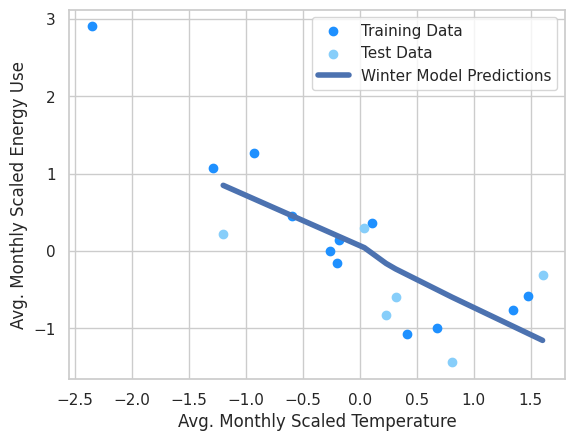

Spring Model MAE:
0.294
Spring R2 Score:
0.872


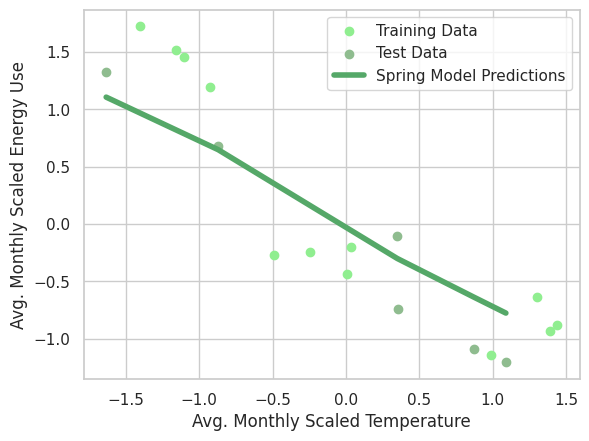

Summer Model MAE:
0.609
Summer R2 Score:
0.536


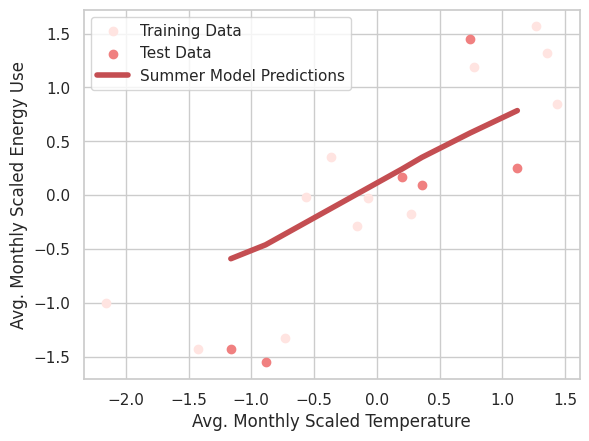

Fall Model MAE:
0.331
Fall R2 Score:
0.796


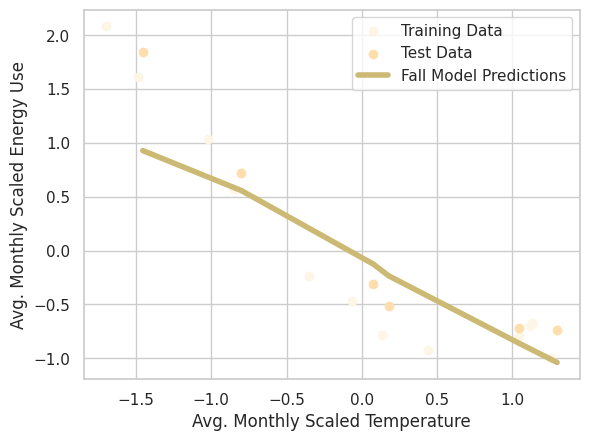

In [ ]:
# Plot each season with it's training and testing data

idx_win = np.argsort(X_m_win_nn_test.flatten())
# Winter
plot_X_m_nn_win_test = X_m_win_nn_test[idx_win]
plot_y_m_win_pred = y_m_win_pred.flatten()[idx_win]

idx_spr = np.argsort(X_m_spr_nn_test.flatten())
# Spring
plot_X_m_nn_spr_test = X_m_spr_nn_test[idx_spr]
plot_y_m_spr_pred = y_m_spr_pred.flatten()[idx_spr]

idx_sum = np.argsort(X_m_sum_nn_test.flatten())
# Summer
plot_X_m_nn_sum_test = X_m_sum_nn_test[idx_sum]
plot_y_m_sum_pred = y_m_sum_pred.flatten()[idx_sum]

idx_fal = np.argsort(X_m_fal_nn_test.flatten())
# Fall
plot_X_m_nn_fal_test = X_m_fal_nn_test[idx_fal]
plot_y_m_fal_pred = y_m_fal_pred.flatten()[idx_fal]

# Plot the actual Winter predictions
print("Winter Model MAE:")
print(mae_m_win_value)
print("Winter R2 Score:")
print(r2_result_m_win_round)
plt.scatter(X_m_win_nn_train, y_m_win_nn_train, label='Training Data', color='dodgerblue')
plt.scatter(X_m_win_nn_test, y_m_win_nn_test, label='Test Data', color='lightskyblue')
plt.plot(plot_X_m_nn_win_test, plot_y_m_win_pred, label='Winter Model Predictions', color='b', linewidth=4)
plt.xlabel('Avg. Monthly Scaled Temperature')
plt.ylabel('Avg. Monthly Scaled Energy Use')
plt.legend()
plt.show()

# Plot the actual Spring predictions
print("Spring Model MAE:")
print(mae_m_spr_value)
print("Spring R2 Score:")
print(r2_result_m_spr_round)
plt.scatter(X_m_spr_nn_train, y_m_spr_nn_train, label='Training Data', color='lightgreen')
plt.scatter(X_m_spr_nn_test, y_m_spr_nn_test, label='Test Data', color='darkseagreen')
plt.plot(plot_X_m_nn_spr_test, plot_y_m_spr_pred, label='Spring Model Predictions', color='g', linewidth=4)
plt.xlabel('Avg. Monthly Scaled Temperature')
plt.ylabel('Avg. Monthly Scaled Energy Use')
plt.legend()
plt.show()

# Plot the actual Summer predicitions
print("Summer Model MAE:")
print(mae_m_sum_value)
print("Summer R2 Score:")
print(r2_result_m_sum_round)
plt.scatter(X_m_sum_nn_train, y_m_sum_nn_train, label='Training Data', color='mistyrose')
plt.scatter(X_m_sum_nn_test, y_m_sum_nn_test, label='Test Data', color='lightcoral')
plt.plot(plot_X_m_nn_sum_test, plot_y_m_sum_pred, label='Summer Model Predictions', color='r', linewidth=4)
plt.xlabel('Avg. Monthly Scaled Temperature')
plt.ylabel('Avg. Monthly Scaled Energy Use')
plt.legend()
plt.show()

# Plot the actual Fall predictions
print("Fall Model MAE:")
print(mae_m_fal_value)
print("Fall R2 Score:")
print(r2_result_m_fal_round)
plt.scatter(X_m_fal_nn_train, y_m_fal_nn_train, label='Training Data', color='oldlace')
plt.scatter(X_m_fal_nn_test, y_m_fal_nn_test, label='Test Data', color='navajowhite')
plt.plot(plot_X_m_nn_fal_test, plot_y_m_fal_pred, label='Fall Model Predictions', color='y', linewidth=4)
plt.xlabel('Avg. Monthly Scaled Temperature')
plt.ylabel('Avg. Monthly Scaled Energy Use')
plt.legend()
plt.show()

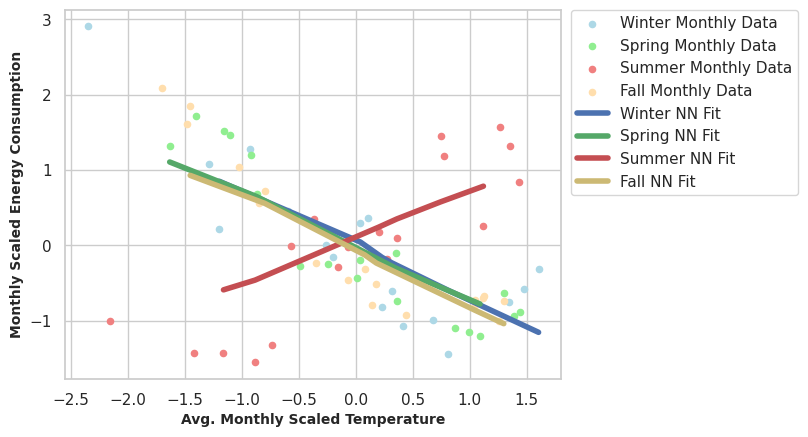

In [ ]:
# Plot ALL results
sns.set(style='whitegrid')
plt.scatter(X_m_win_temp, Y_m_win_ener, color='lightblue', s=20, label='Winter Monthly Data')
plt.scatter(X_m_spr_temp, Y_m_spr_ener, color='lightgreen', s=20, label='Spring Monthly Data')
plt.scatter(X_m_sum_temp, Y_m_sum_ener, color='lightcoral', s=20, label='Summer Monthly Data')
plt.scatter(X_m_fal_temp, Y_m_fal_ener, color='navajowhite', s=20, label='Fall Monthly Data')
plt.plot(plot_X_m_nn_win_test, plot_y_m_win_pred, color="b", linewidth=4, label='Winter NN Fit')
plt.plot(plot_X_m_nn_spr_test, plot_y_m_spr_pred, color="g", linewidth=4, label='Spring NN Fit')
plt.plot(plot_X_m_nn_sum_test, plot_y_m_sum_pred, color="r", linewidth=4, label='Summer NN Fit')
plt.plot(plot_X_m_nn_fal_test, plot_y_m_fal_pred, color="y", linewidth=4, label='Fall NN Fit')
plt.ylabel("Monthly Scaled Energy Consumption", fontweight ='bold', fontsize = 10)
plt.xlabel("Avg. Monthly Scaled Temperature", fontweight ='bold', fontsize = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

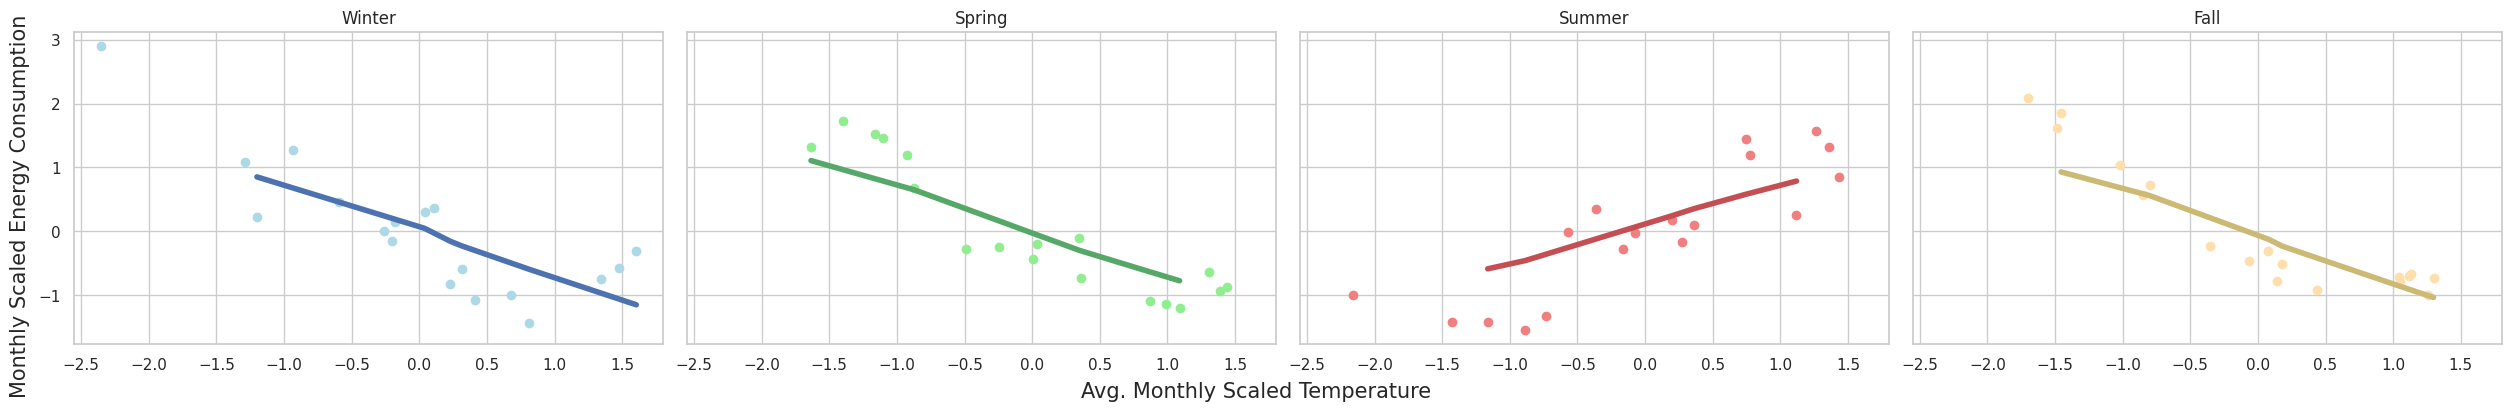

In [ ]:
# Side by side plot
# Plot it all together:
figure,  (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, constrained_layout=True, figsize=(25, 4))
ax1.plot(X_m_win_temp, Y_m_win_ener, color='lightblue', marker='o', linestyle='None', label='Winter Monthly Data')
ax1.plot(plot_X_m_nn_win_test, plot_y_m_win_pred, color="b", linewidth=4, label='Winter SVR Fit')
ax1.set_title("Winter")
ax1.grid(True)

ax2.plot(X_m_spr_temp, Y_m_spr_ener, color='lightgreen', marker='o', linestyle='None', label='Spring Monthly Data')
ax2.plot(plot_X_m_nn_spr_test, plot_y_m_spr_pred, color="g", linewidth=4, label='Spring SVR Fit')
ax2.set_title("Spring")
ax2.grid(True)

ax3.plot(X_m_sum_temp, Y_m_sum_ener, color='lightcoral', marker='o', linestyle='None', label='Summer Monthly Data')
ax3.plot(plot_X_m_nn_sum_test, plot_y_m_sum_pred, color="r", linewidth=4, label='Summer SVR Fit')
ax3.set_title("Summer")
ax3.grid(True)

ax4.plot(X_m_fal_temp, Y_m_fal_ener, color='navajowhite', marker='o', linestyle='None', label='Fall Monthly Data')
ax4.plot(plot_X_m_nn_fal_test, plot_y_m_fal_pred, color="y", linewidth=4, label='Fall SVR Fit')
ax4.set_title("Fall")
ax4.grid(True)

figure.supxlabel('Avg. Monthly Scaled Temperature', fontsize=15)
figure.supylabel('Monthly Scaled Energy Consumption', fontsize=15)
#figure.legend(custom_lines, ['Winter', 'Spring', 'Summer', 'Fall'], loc='lower right', ncol=4)
plt.show()

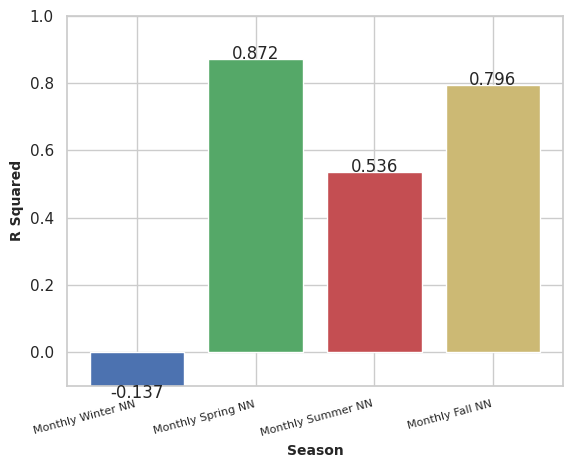

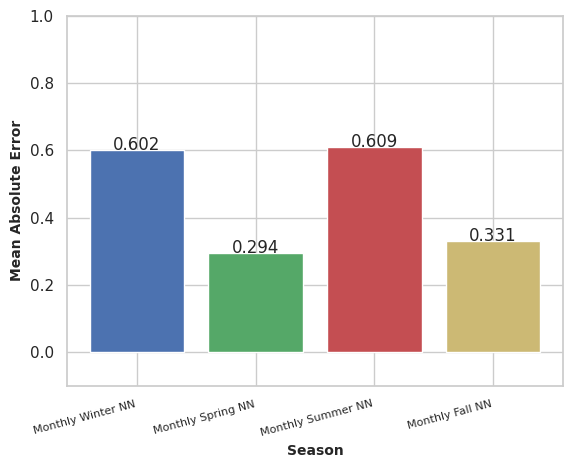

In [ ]:
# Create a bar-chart to demonstrate the difference in fit between each seasonal model
# Function to place labels at the center of each bar
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center

# First R2
plt.ylim(-0.1, 1)
bar_positions = np.arange(4)

label_m_nn_x_r2 = ['Monthly Winter', 'Monthly Spring', 'Monthly Summer', 'Monthly Fall']
label_m_nn_y_r2 = [r2_result_m_win_round, r2_result_m_spr_round, r2_result_m_sum_round, r2_result_m_fal_round]

plt.bar(bar_positions[0], r2_result_m_win_round, color ='b', edgecolor ='w', label ='Winter NN Monthly R2')
plt.bar(bar_positions[1], r2_result_m_spr_round, color ='g', edgecolor ='w', label ='Spring NN Monthly R2')
plt.bar(bar_positions[2], r2_result_m_sum_round, color ='r', edgecolor ='w', label ='Summer NN Monthly R2')
plt.bar(bar_positions[3], r2_result_m_fal_round, color ='y', edgecolor ='w', label ='Fall NN Monthly R2')
plt.xticks(bar_positions, ['Monthly Winter NN', 'Monthly Spring NN', 'Monthly Summer NN', 'Monthly Fall NN'], fontsize=8, rotation=15, ha='right')

add_labels(label_m_nn_x_r2, label_m_nn_y_r2)

plt.xlabel('Season', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

# Next MAE
plt.ylim(-0.1, 1)
bar_positions = np.arange(4)

label_m_nn_x_mae = ['Monthly Winter', 'Monthly Spring', 'Monthly Summer', 'Monthly Fall']
label_m_nn_y_mae = [mae_m_win_value, mae_m_spr_value, mae_m_sum_value, mae_m_fal_value]

plt.bar(bar_positions[0], mae_m_win_value, color ='b', edgecolor ='w', label ='Winter NN Monthly MAE')
plt.bar(bar_positions[1], mae_m_spr_value, color ='g', edgecolor ='w', label ='Spring NN Monthly MAE')
plt.bar(bar_positions[2], mae_m_sum_value, color ='r', edgecolor ='w', label ='Summer NN Monthly MAE')
plt.bar(bar_positions[3], mae_m_fal_value, color ='y', edgecolor ='w', label ='Fall NN Monthly MAE')
plt.xticks(bar_positions, ['Monthly Winter NN', 'Monthly Spring NN', 'Monthly Summer NN', 'Monthly Fall NN'], fontsize=8, rotation=15, ha='right')

add_labels(label_m_nn_x_mae, label_m_nn_y_mae)

plt.xlabel('Season', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()

# Building 1, Neural Network (Seasonal Energy Use Analysis, Daily)

In [ ]:
# Feature Scaling in the DAILY Timestep (do for each season)
X_d_win_temp = sc_Xd.fit_transform(b1_daily_winter[['Temp']])
Y_d_win_ener = sc_yd.fit_transform(b1_daily_winter[['EnergyUse']])

X_d_spr_temp = sc_Xd.fit_transform(b1_daily_spring[['Temp']])
Y_d_spr_ener = sc_yd.fit_transform(b1_daily_spring[['EnergyUse']])

X_d_sum_temp = sc_Xd.fit_transform(b1_daily_summer[['Temp']])
Y_d_sum_ener = sc_yd.fit_transform(b1_daily_summer[['EnergyUse']])

X_d_fal_temp = sc_Xd.fit_transform(b1_daily_fall[['Temp']])
Y_d_fal_ener = sc_yd.fit_transform(b1_daily_fall[['EnergyUse']])

In [ ]:
# Assign daily data (do for each season) and split for training and testing

# WINTER
X_d_win_nn = X_d_win_temp.astype(float)
y_d_win_nn = Y_d_win_ener.astype(float)

# Split into training and testing (30% test, 70% train)
X_d_win_nn_train, X_d_win_nn_test, y_d_win_nn_train, y_d_win_nn_test = train_test_split(X_d_win_nn, y_d_win_nn, test_size=0.3, random_state=42)

# Spring
X_d_spr_nn = X_d_spr_temp.astype(float)
y_d_spr_nn = Y_d_spr_ener.astype(float)

# Split into training and testing (30% test, 70% train)
X_d_spr_nn_train, X_d_spr_nn_test, y_d_spr_nn_train, y_d_spr_nn_test = train_test_split(X_d_spr_nn, y_d_spr_nn, test_size=0.3, random_state=42)

# Summer
X_d_sum_nn = X_d_sum_temp.astype(float)
y_d_sum_nn = Y_d_sum_ener.astype(float)

# Split into training and testing (30% test, 70% train)
X_d_sum_nn_train, X_d_sum_nn_test, y_d_sum_nn_train, y_d_sum_nn_test = train_test_split(X_d_sum_nn, y_d_sum_nn, test_size=0.3, random_state=42)

# Fall
X_d_fal_nn = X_d_fal_temp.astype(float)
y_d_fal_nn = Y_d_fal_ener.astype(float)

# Split into training and testing (30% test, 70% train)
X_d_fal_nn_train, X_d_fal_nn_test, y_d_fal_nn_train, y_d_fal_nn_test = train_test_split(X_d_fal_nn, y_d_fal_nn, test_size=0.3, random_state=42)

In [ ]:
model_d_win = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_d_win.summary()

model_d_spr = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_d_spr.summary()

model_d_sum = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_d_sum.summary()

model_d_fal = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_d_fal.summary()

In [ ]:
# Compile each model with loss function and optimizer
model_d_win.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

model_d_spr.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

model_d_sum.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

model_d_fal.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

In [ ]:
# Train winter model
# Adjust the number of epochs and batch size based on your data and resources.
model_d_win.fit(X_d_win_nn_train, y_d_win_nn_train, epochs=25, batch_size=32, validation_data=(X_d_win_nn_test, y_d_win_nn_test))

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - MeanAbsoluteError: 0.6599 - loss: 0.7344 - val_MeanAbsoluteError: 0.5342 - val_loss: 0.5187
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - MeanAbsoluteError: 0.4959 - loss: 0.4648 - val_MeanAbsoluteError: 0.4065 - val_loss: 0.2939
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - MeanAbsoluteError: 0.3494 - loss: 0.2051 - val_MeanAbsoluteError: 0.3436 - val_loss: 0.1993
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - MeanAbsoluteError: 0.3185 - loss: 0.1711 - val_MeanAbsoluteError: 0.3411 - val_loss: 0.1747
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - MeanAbsoluteError: 0.3267 - loss: 0.1649 - val_MeanAbsoluteError: 0.3390 - val_loss: 0.1756
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - MeanAbsoluteError: 0.3251 - loss: 0.1737 - val_MeanAbsoluteError: 0.3360 - val_loss: 0.1746
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - MeanAbsoluteError: 0.3228 - loss: 0.1716 - val_MeanAbsoluteError: 0.3318 - val_loss: 0.1699

In [ ]:
# Train spring model
# Adjust the number of epochs and batch size based on your data and resources.
model_d_spr.fit(X_d_spr_nn_train, y_d_spr_nn_train, epochs=25, batch_size=32, validation_data=(X_d_spr_nn_test, y_d_spr_nn_test))

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - MeanAbsoluteError: 0.9303 - loss: 1.2815 - val_MeanAbsoluteError: 0.7355 - val_loss: 0.9212
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - MeanAbsoluteError: 0.7450 - loss: 0.8721 - val_MeanAbsoluteError: 0.5869 - val_loss: 0.5953
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - MeanAbsoluteError: 0.5911 - loss: 0.5403 - val_MeanAbsoluteError: 0.4714 - val_loss: 0.3953
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - MeanAbsoluteError: 0.4727 - loss: 0.3382 - val_MeanAbsoluteError: 0.4028 - val_loss: 0.2759
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - MeanAbsoluteError: 0.4100 - loss: 0.2630 - val_MeanAbsoluteError: 0.3797 - val_loss: 0.2306
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - MeanAbsoluteError: 0.3869 - loss: 0.2382 - val_MeanAbsoluteError: 0.3545 - val_loss: 0.1999
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - MeanAbsoluteError: 0.3588 - loss: 0.2058 - val_MeanAbsoluteError: 0.3343 - val_loss: 0.1805

In [ ]:
# Train summer model
# Adjust the number of epochs and batch size based on your data and resources.
model_d_sum.fit(X_d_sum_nn_train, y_d_sum_nn_train, epochs=25, batch_size=32, validation_data=(X_d_sum_nn_test, y_d_sum_nn_test))

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - MeanAbsoluteError: 0.7340 - loss: 0.7806 - val_MeanAbsoluteError: 0.6574 - val_loss: 0.6649
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - MeanAbsoluteError: 0.6562 - loss: 0.6319 - val_MeanAbsoluteError: 0.6207 - val_loss: 0.5666
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - MeanAbsoluteError: 0.5923 - loss: 0.5118 - val_MeanAbsoluteError: 0.6058 - val_loss: 0.5304
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - MeanAbsoluteError: 0.6116 - loss: 0.5753 - val_MeanAbsoluteError: 0.6106 - val_loss: 0.5229
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - MeanAbsoluteError: 0.5799 - loss: 0.5121 - val_MeanAbsoluteError: 0.6145 - val_loss: 0.5276
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - MeanAbsoluteError: 0.5764 - loss: 0.5211 - val_MeanAbsoluteError: 0.6168 - val_loss: 0.5310
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - MeanAbsoluteError: 0.5830 - loss: 0.5244 - val_MeanAbsoluteError: 0.6173 - val_loss: 0.5347

In [ ]:
# Train fall model
# Adjust the number of epochs and batch size based on your data and resources.
model_d_fal.fit(X_d_fal_nn_train, y_d_fal_nn_train, epochs=25, batch_size=32, validation_data=(X_d_fal_nn_test, y_d_fal_nn_test))

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - MeanAbsoluteError: 0.7203 - loss: 0.8222 - val_MeanAbsoluteError: 0.7394 - val_loss: 0.8912
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - MeanAbsoluteError: 0.6145 - loss: 0.6004 - val_MeanAbsoluteError: 0.6579 - val_loss: 0.6710
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - MeanAbsoluteError: 0.5798 - loss: 0.5397 - val_MeanAbsoluteError: 0.5925 - val_loss: 0.5269
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - MeanAbsoluteError: 0.4848 - loss: 0.3586 - val_MeanAbsoluteError: 0.5406 - val_loss: 0.4276
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - MeanAbsoluteError: 0.4861 - loss: 0.3492 - val_MeanAbsoluteError: 0.4951 - val_loss: 0.3483
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - MeanAbsoluteError: 0.4535 - loss: 0.2909 - val_MeanAbsoluteError: 0.4531 - val_loss: 0.2894
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - MeanAbsoluteError: 0.4105 - loss: 0.2423 - val_MeanAbsoluteError: 0.4121 - val_loss: 0.2423

In [ ]:
# Make predicition using trained models
# WINTER
y_d_win_pred = model_d_win.predict(X_d_win_nn_test)
y_d_win_pred = y_d_win_pred.astype(float)

# Extract the MAE
mae_d_win_loss, mae_d_win_value = model_d_win.evaluate(X_d_win_nn_test, y_d_win_nn_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred, just evaluates the model
mae_d_win_value = round(mae_d_win_value, 3)

# Extract the R2 Value
r2metric_d_win = keras.metrics.R2Score()
r2metric_d_win.update_state(y_d_win_nn_test, y_d_win_pred)
r2_result_d_win = r2metric_d_win.result()

r2_d_win_nn = r2_score(y_d_win_nn_test, y_d_win_pred)
r2_result_d_win_round = round(r2_d_win_nn, 3)

# SPRING
y_d_spr_pred = model_d_spr.predict(X_d_spr_nn_test)
y_d_spr_pred = y_d_spr_pred.astype(float)

# Extract the MAE
mae_d_spr_loss, mae_d_spr_value = model_d_spr.evaluate(X_d_spr_nn_test, y_d_spr_nn_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred, just evaluates the model
mae_d_spr_value = round(mae_d_spr_value, 3)

# Extract the R2 Value
r2metric_d_spr = keras.metrics.R2Score()
r2metric_d_spr.update_state(y_d_spr_nn_test, y_d_spr_pred)
r2_result_d_spr = r2metric_d_spr.result()

r2_d_spr_nn = r2_score(y_d_spr_nn_test, y_d_spr_pred)
r2_result_d_spr_round = round(r2_d_spr_nn, 3)

# SUMMER
y_d_sum_pred = model_d_sum.predict(X_d_sum_nn_test)
y_d_sum_pred = y_d_sum_pred.astype(float)

# Extract the MAE
mae_d_sum_loss, mae_d_sum_value = model_d_sum.evaluate(X_d_sum_nn_test, y_d_sum_nn_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred, just evaluates the model
mae_d_sum_value = round(mae_d_sum_value, 3)

# Extract the R2 value
r2metric_d_sum = keras.metrics.R2Score()
r2metric_d_sum.update_state(y_d_sum_nn_test, y_d_sum_pred)
r2_result_d_sum = r2metric_d_sum.result()

r2_d_sum_nn = r2_score(y_d_sum_nn_test, y_d_sum_pred)
r2_result_d_sum_round = round(r2_d_sum_nn, 3)

# FALL
y_d_fal_pred = model_d_fal.predict(X_d_fal_nn_test)
y_d_fal_pred = y_d_fal_pred.astype(float)

# Extract the MAE
mae_d_fal_loss, mae_d_fal_value = model_d_fal.evaluate(X_d_fal_nn_test, y_d_fal_nn_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred, just evaluates the model
mae_d_fal_value = round(mae_d_fal_value, 3)

# Extract the R2 value
r2metric_d_fal = keras.metrics.R2Score()
r2metric_d_fal.update_state(y_d_fal_nn_test, y_d_fal_pred)
r2_result_d_fal = r2metric_d_fal.result()

r2_d_fal_nn = r2_score(y_d_fal_nn_test, y_d_fal_pred)
r2_result_d_fal_round = round(r2_d_fal_nn, 3)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


Winter Model MAE:
0.326
Winter R2 Score:
tf.Tensor(0.8407401, shape=(), dtype=float32)


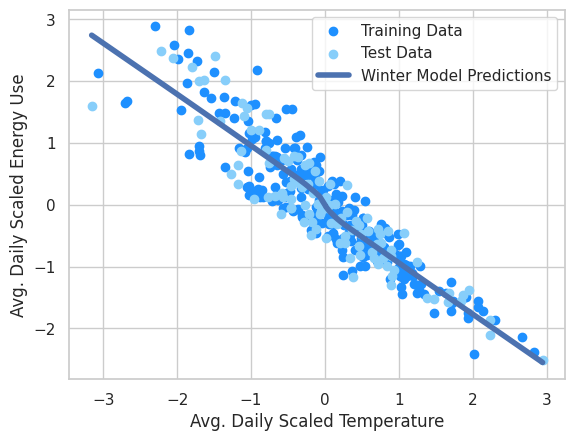

Spring Model MAE:
0.286
Spring R2 Score:
tf.Tensor(0.84616756, shape=(), dtype=float32)


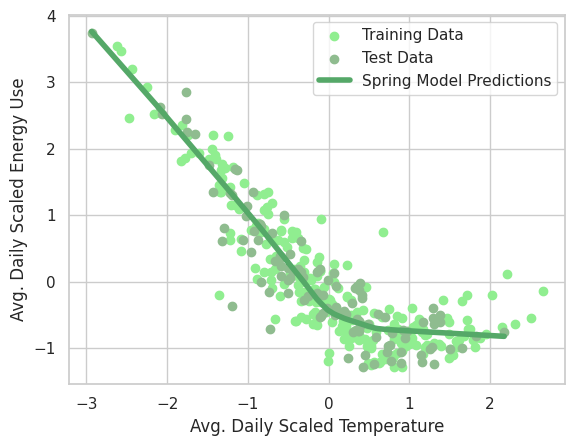

Summer Model MAE:
0.62
Summer R2 Score:
tf.Tensor(0.44452918, shape=(), dtype=float32)


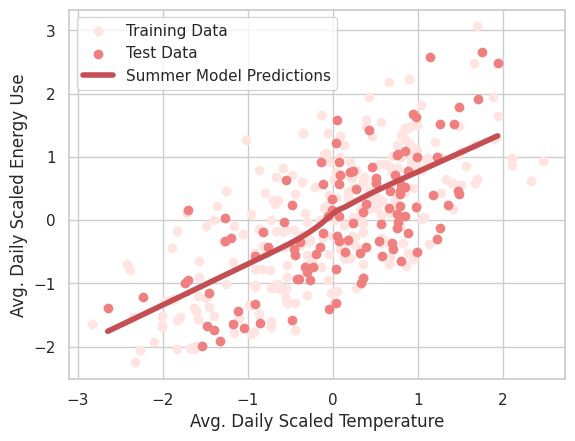

Fall Model MAE:
0.267
Fall R2 Score:
tf.Tensor(0.9179135, shape=(), dtype=float32)


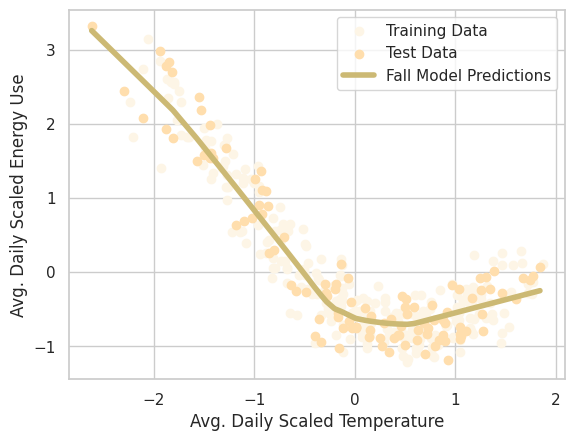

In [ ]:
# Plot each season with it's training and testing data

idx_win_d = np.argsort(X_d_win_nn_test.flatten())
# Winter
plot_X_d_nn_win_test = X_d_win_nn_test[idx_win_d]
plot_y_d_win_pred = y_d_win_pred.flatten()[idx_win_d]

idx_spr_d = np.argsort(X_d_spr_nn_test.flatten())
# Spring
plot_X_d_nn_spr_test = X_d_spr_nn_test[idx_spr_d]
plot_y_d_spr_pred = y_d_spr_pred.flatten()[idx_spr_d]

idx_sum_d = np.argsort(X_d_sum_nn_test.flatten())
# Summer
plot_X_d_nn_sum_test = X_d_sum_nn_test[idx_sum_d]
plot_y_d_sum_pred = y_d_sum_pred.flatten()[idx_sum_d]

idx_fal_d = np.argsort(X_d_fal_nn_test.flatten())
# Fall
plot_X_d_nn_fal_test = X_d_fal_nn_test[idx_fal_d]
plot_y_d_fal_pred = y_d_fal_pred.flatten()[idx_fal_d]

# Plot the actual Winter predictions
print("Winter Model MAE:")
print(mae_d_win_value)
print("Winter R2 Score:")
print(r2_result_d_win)
plt.scatter(X_d_win_nn_train, y_d_win_nn_train, label='Training Data', color='dodgerblue')
plt.scatter(X_d_win_nn_test, y_d_win_nn_test, label='Test Data', color='lightskyblue')
plt.plot(plot_X_d_nn_win_test, plot_y_d_win_pred, label='Winter Model Predictions', color='b', linewidth=4)
plt.xlabel('Avg. Daily Scaled Temperature')
plt.ylabel('Avg. Daily Scaled Energy Use')
plt.legend()
plt.show()

# Plot the actual Spring predictions
print("Spring Model MAE:")
print(mae_d_spr_value)
print("Spring R2 Score:")
print(r2_result_d_spr)
plt.scatter(X_d_spr_nn_train, y_d_spr_nn_train, label='Training Data', color='lightgreen')
plt.scatter(X_d_spr_nn_test, y_d_spr_nn_test, label='Test Data', color='darkseagreen')
plt.plot(plot_X_d_nn_spr_test, plot_y_d_spr_pred, label='Spring Model Predictions', color='g', linewidth=4)
plt.xlabel('Avg. Daily Scaled Temperature')
plt.ylabel('Avg. Daily Scaled Energy Use')
plt.legend()
plt.show()

# Plot the actual Summer predicitions
print("Summer Model MAE:")
print(mae_d_sum_value)
print("Summer R2 Score:")
print(r2_result_d_sum)
plt.scatter(X_d_sum_nn_train, y_d_sum_nn_train, label='Training Data', color='mistyrose')
plt.scatter(X_d_sum_nn_test, y_d_sum_nn_test, label='Test Data', color='lightcoral')
plt.plot(plot_X_d_nn_sum_test, plot_y_d_sum_pred, label='Summer Model Predictions', color='r', linewidth=4)
plt.xlabel('Avg. Daily Scaled Temperature')
plt.ylabel('Avg. Daily Scaled Energy Use')
plt.legend()
plt.show()

# Plot the actual Fall predictions
print("Fall Model MAE:")
print(mae_d_fal_value)
print("Fall R2 Score:")
print(r2_result_d_fal)
plt.scatter(X_d_fal_nn_train, y_d_fal_nn_train, label='Training Data', color='oldlace')
plt.scatter(X_d_fal_nn_test, y_d_fal_nn_test, label='Test Data', color='navajowhite')
plt.plot(plot_X_d_nn_fal_test, plot_y_d_fal_pred, label='Fall Model Predictions', color='y', linewidth=4)
plt.xlabel('Avg. Daily Scaled Temperature')
plt.ylabel('Avg. Daily Scaled Energy Use')
plt.legend()
plt.show()

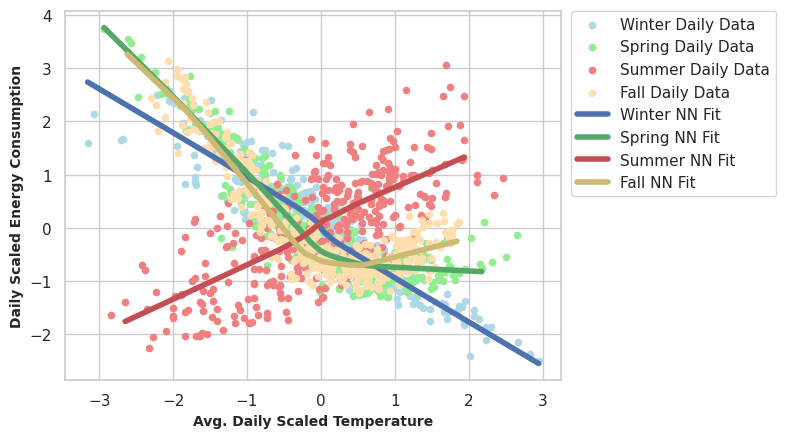

In [ ]:
# Plot ALL results
sns.set(style='whitegrid')
plt.scatter(X_d_win_temp, Y_d_win_ener, color='lightblue', s=20, label='Winter Daily Data')
plt.scatter(X_d_spr_temp, Y_d_spr_ener, color='lightgreen', s=20, label='Spring Daily Data')
plt.scatter(X_d_sum_temp, Y_d_sum_ener, color='lightcoral', s=20, label='Summer Daily Data')
plt.scatter(X_d_fal_temp, Y_d_fal_ener, color='navajowhite', s=20, label='Fall Daily Data')
plt.plot(plot_X_d_nn_win_test, plot_y_d_win_pred, color="b", linewidth=4, label='Winter NN Fit')
plt.plot(plot_X_d_nn_spr_test, plot_y_d_spr_pred, color="g", linewidth=4, label='Spring NN Fit')
plt.plot(plot_X_d_nn_sum_test, plot_y_d_sum_pred, color="r", linewidth=4, label='Summer NN Fit')
plt.plot(plot_X_d_nn_fal_test, plot_y_d_fal_pred, color="y", linewidth=4, label='Fall NN Fit')
plt.ylabel("Daily Scaled Energy Consumption", fontweight ='bold', fontsize = 10)
plt.xlabel("Avg. Daily Scaled Temperature", fontweight ='bold', fontsize = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

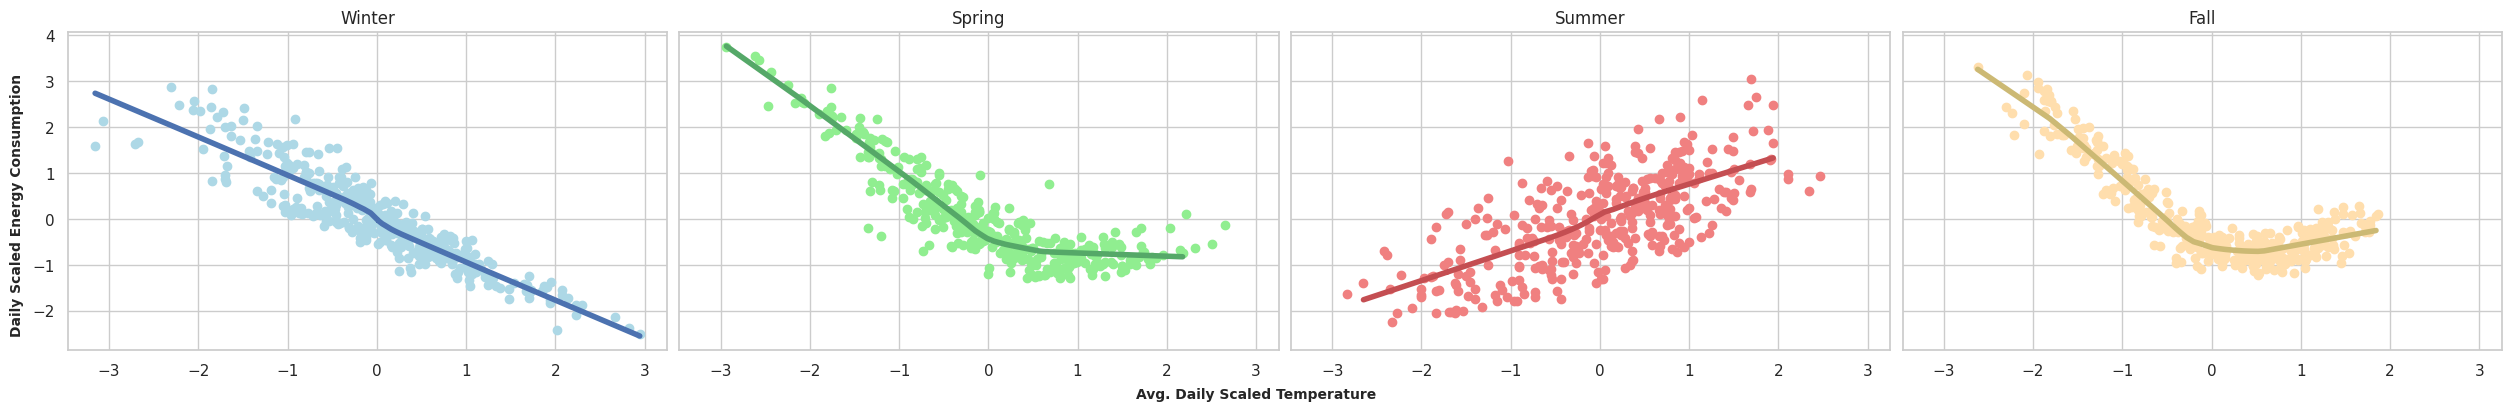

In [ ]:
# Side by side plot
# Plot it all together:
figure,  (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, constrained_layout=True, figsize=(25, 4))
ax1.plot(X_d_win_temp, Y_d_win_ener, color='lightblue', marker='o', linestyle='None', label='Winter Daily Data')
ax1.plot(plot_X_d_nn_win_test, plot_y_d_win_pred, color="b", linewidth=4, label='Winter SVR Fit')
ax1.set_title("Winter")
ax1.grid(True)

ax2.plot(X_d_spr_temp, Y_d_spr_ener, color='lightgreen', marker='o', linestyle='None', label='Spring Daily Data')
ax2.plot(plot_X_d_nn_spr_test, plot_y_d_spr_pred, color="g", linewidth=4, label='Spring SVR Fit')
ax2.set_title("Spring")
ax2.grid(True)

ax3.plot(X_d_sum_temp, Y_d_sum_ener, color='lightcoral', marker='o', linestyle='None', label='Summer Daily Data')
ax3.plot(plot_X_d_nn_sum_test, plot_y_d_sum_pred, color="r", linewidth=4, label='Summer SVR Fit')
ax3.set_title("Summer")
ax3.grid(True)

ax4.plot(X_d_fal_temp, Y_d_fal_ener, color='navajowhite', marker='o', linestyle='None', label='Fall Daily Data')
ax4.plot(plot_X_d_nn_fal_test, plot_y_d_fal_pred, color="y", linewidth=4, label='Fall SVR Fit')
ax4.set_title("Fall")
ax4.grid(True)

figure.supxlabel('Avg. Daily Scaled Temperature', fontweight ='bold', fontsize = 10)
figure.supylabel('Daily Scaled Energy Consumption', fontweight ='bold', fontsize = 10)
#figure.legend(custom_lines, ['Winter', 'Spring', 'Summer', 'Fall'], loc='lower right', ncol=4)
plt.show()

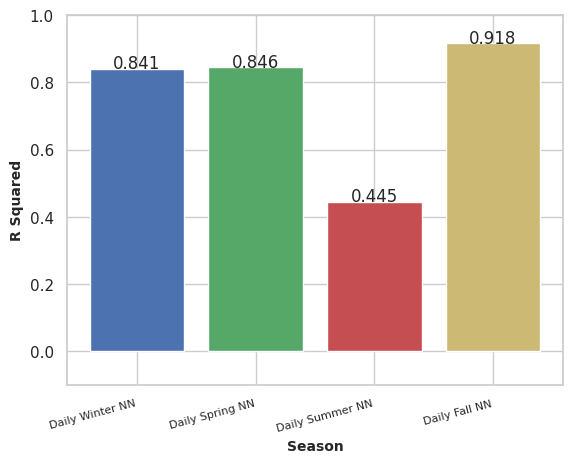

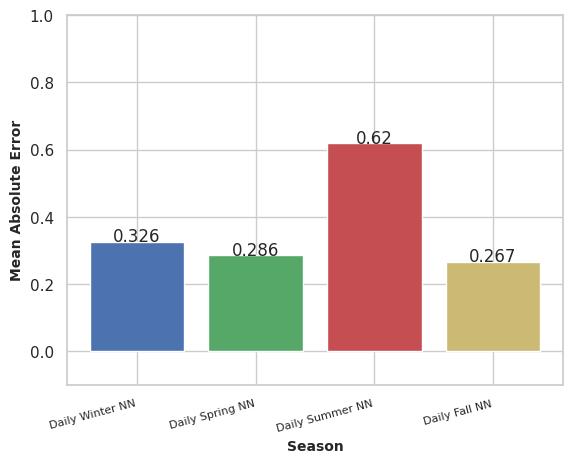

In [ ]:
# Create a bar-chart to demonstrate the difference in fit between each seasonal model
# Function to place labels at the center of each bar
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center

# First R2
plt.ylim(-0.1, 1)
bar_positions = np.arange(4)

label_d_nn_x_r2 = ['Daily Winter', 'Daily Spring', 'Daily Summer', 'Daily Fall']
label_d_nn_y_r2 = [r2_result_d_win_round, r2_result_d_spr_round, r2_result_d_sum_round, r2_result_d_fal_round]

plt.bar(bar_positions[0], r2_result_d_win_round, color ='b', edgecolor ='w', label ='Winter NN Daily R2')
plt.bar(bar_positions[1], r2_result_d_spr_round, color ='g', edgecolor ='w', label ='Spring NN Daily R2')
plt.bar(bar_positions[2], r2_result_d_sum_round, color ='r', edgecolor ='w', label ='Summer NN Daily R2')
plt.bar(bar_positions[3], r2_result_d_fal_round, color ='y', edgecolor ='w', label ='Fall NN Daily R2')
plt.xticks(bar_positions, ['Daily Winter NN', 'Daily Spring NN', 'Daily Summer NN', 'Daily Fall NN'], fontsize=8, rotation=15, ha='right')

add_labels(label_d_nn_x_r2, label_d_nn_y_r2)

plt.xlabel('Season', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

# Next MAE
plt.ylim(-0.1, 1)
bar_positions = np.arange(4)

label_d_nn_x_mae = ['Daily Winter', 'Daily Spring', 'Daily Summer', 'Daily Fall']
label_d_nn_y_mae = [mae_d_win_value, mae_d_spr_value, mae_d_sum_value, mae_d_fal_value]

plt.bar(bar_positions[0], mae_d_win_value, color ='b', edgecolor ='w', label ='Winter NN Daily MAE')
plt.bar(bar_positions[1], mae_d_spr_value, color ='g', edgecolor ='w', label ='Spring NN Daily MAE')
plt.bar(bar_positions[2], mae_d_sum_value, color ='r', edgecolor ='w', label ='Summer NN Daily MAE')
plt.bar(bar_positions[3], mae_d_fal_value, color ='y', edgecolor ='w', label ='Fall NN Daily MAE')
plt.xticks(bar_positions, ['Daily Winter NN', 'Daily Spring NN', 'Daily Summer NN', 'Daily Fall NN'], fontsize=8, rotation=15, ha='right')

add_labels(label_d_nn_x_mae, label_d_nn_y_mae)

plt.xlabel('Season', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()

# Building 1, Neural Network (Seasonal Energy Use Analysis, Hourly)

In [ ]:
# Feature Scaling in the HOURLY Timestep (do for each season)
X_h_win_temp = sc_Xd.fit_transform(b1_hourly_winter[['Temp']])
Y_h_win_ener = sc_yd.fit_transform(b1_hourly_winter[['EnergyUse']])

X_h_spr_temp = sc_Xd.fit_transform(b1_hourly_spring[['Temp']])
Y_h_spr_ener = sc_yd.fit_transform(b1_hourly_spring[['EnergyUse']])

X_h_sum_temp = sc_Xd.fit_transform(b1_hourly_summer[['Temp']])
Y_h_sum_ener = sc_yd.fit_transform(b1_hourly_summer[['EnergyUse']])

X_h_fal_temp = sc_Xd.fit_transform(b1_hourly_fall[['Temp']])
Y_h_fal_ener = sc_yd.fit_transform(b1_hourly_fall[['EnergyUse']])

In [ ]:
# Assign hourly data (do for each season) and split for training and testing

# WINTER
X_h_win_nn = X_h_win_temp.astype(float)
y_h_win_nn = Y_h_win_ener.astype(float)

# Split into training and testing (30% test, 70% train)
X_h_win_nn_train, X_h_win_nn_test, y_h_win_nn_train, y_h_win_nn_test = train_test_split(X_h_win_nn, y_h_win_nn, test_size=0.3, random_state=42)

# Spring
X_h_spr_nn = X_h_spr_temp.astype(float)
y_h_spr_nn = Y_h_spr_ener.astype(float)

# Split into training and testing (30% test, 70% train)
X_h_spr_nn_train, X_h_spr_nn_test, y_h_spr_nn_train, y_h_spr_nn_test = train_test_split(X_h_spr_nn, y_h_spr_nn, test_size=0.3, random_state=42)

# Summer
X_h_sum_nn = X_h_sum_temp.astype(float)
y_h_sum_nn = Y_h_sum_ener.astype(float)

# Split into training and testing (30% test, 70% train)
X_h_sum_nn_train, X_h_sum_nn_test, y_h_sum_nn_train, y_h_sum_nn_test = train_test_split(X_h_sum_nn, y_h_sum_nn, test_size=0.3, random_state=42)

# Fall
X_h_fal_nn = X_h_fal_temp.astype(float)
y_h_fal_nn = Y_h_fal_ener.astype(float)

# Split into training and testing (30% test, 70% train)
X_h_fal_nn_train, X_h_fal_nn_test, y_h_fal_nn_train, y_h_fal_nn_test = train_test_split(X_h_fal_nn, y_h_fal_nn, test_size=0.3, random_state=42)

In [ ]:
model_h_win = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_h_win.summary()

model_h_spr = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_h_spr.summary()

model_h_sum = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_h_sum.summary()

model_h_fal = keras.Sequential([
    layers.Input(shape=(1,)),        # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1)                  # Output layer
])
# model_h_fal.summary()

In [ ]:
# Compile each model with loss function and optimizer
model_h_win.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

model_h_spr.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

model_h_sum.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

model_h_fal.compile(optimizer='adam', loss='mse', metrics=['MeanAbsoluteError'])

In [ ]:
# Train winter model
# Adjust the number of epochs and batch size based on your data and resources.
model_h_win.fit(X_h_win_nn_train, y_h_win_nn_train, epochs=25, batch_size=32, validation_data=(X_h_win_nn_test, y_h_win_nn_test))

Epoch 1/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - MeanAbsoluteError: 0.5253 - loss: 0.5019 - val_MeanAbsoluteError: 0.3800 - val_loss: 0.2465
Epoch 2/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3805 - loss: 0.2430 - val_MeanAbsoluteError: 0.3855 - val_loss: 0.2536
Epoch 3/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3825 - loss: 0.2435 - val_MeanAbsoluteError: 0.3789 - val_loss: 0.2457
Epoch 4/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3901 - loss: 0.2527 - val_MeanAbsoluteError: 0.3801 - val_loss: 0.2463
Epoch 5/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 0.3833 - loss: 0.2488 - val_MeanAbsoluteError: 0.3802 - val_loss: 0.2464
Epoch 6/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3793 - loss: 0.2431 - val_MeanAbsoluteError: 0.3839 - val_loss: 0.2545
Epoch 7/25
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 0.3868 - loss: 0.2524 - val_MeanAbsoluteError: 0.38

In [ ]:
# Train spring model
# Adjust the number of epochs and batch size based on your data and resources.
model_h_spr.fit(X_h_spr_nn_train, y_h_spr_nn_train, epochs=25, batch_size=32, validation_data=(X_h_spr_nn_test, y_h_spr_nn_test))

Epoch 1/25
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - MeanAbsoluteError: 0.5343 - loss: 0.5099 - val_MeanAbsoluteError: 0.4029 - val_loss: 0.2674
Epoch 2/25
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.4091 - loss: 0.2759 - val_MeanAbsoluteError: 0.4025 - val_loss: 0.2643
Epoch 3/25
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.4199 - loss: 0.2921 - val_MeanAbsoluteError: 0.4089 - val_loss: 0.2660
Epoch 4/25
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.4079 - loss: 0.2716 - val_MeanAbsoluteError: 0.4018 - val_loss: 0.2636
Epoch 5/25
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - MeanAbsoluteError: 0.4131 - loss: 0.2761 - val_MeanAbsoluteError: 0.4049 - val_loss: 0.2628
Epoch 6/25
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 0.4103 - loss: 0.2753 - val_MeanAbsoluteError: 0.4030 - val_loss: 0.2674
Epoch 7/25
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.4232 - loss: 0.2929 - val_MeanAbsoluteError: 0.39

In [ ]:
# Train summer model
# Adjust the number of epochs and batch size based on your data and resources.
model_h_sum.fit(X_h_sum_nn_train, y_h_sum_nn_train, epochs=25, batch_size=32, validation_data=(X_h_sum_nn_test, y_h_sum_nn_test))

Epoch 1/25
194/194 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - MeanAbsoluteError: 0.7550 - loss: 0.9545 - val_MeanAbsoluteError: 0.7451 - val_loss: 0.9675
Epoch 2/25
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.7389 - loss: 0.9562 - val_MeanAbsoluteError: 0.7361 - val_loss: 0.9691
Epoch 3/25
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 0.7320 - loss: 0.9449 - val_MeanAbsoluteError: 0.7493 - val_loss: 0.9704
Epoch 4/25
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.7346 - loss: 0.9474 - val_MeanAbsoluteError: 0.7426 - val_loss: 0.9664
Epoch 5/25
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.7374 - loss: 0.9513 - val_MeanAbsoluteError: 0.7428 - val_loss: 0.9664
Epoch 6/25
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.7347 - loss: 0.9566 - val_MeanAbsoluteError: 0.7418 - val_loss: 0.9657
Epoch 7/25
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.7524 - loss: 0.9794 - val_MeanAbsoluteError: 0.73

In [ ]:
# Train fall model
# Adjust the number of epochs and batch size based on your data and resouces.
model_h_fal.fit(X_h_fal_nn_train, y_h_fal_nn_train, epochs=25, batch_size=32, validation_data=(X_h_fal_nn_test, y_h_fal_nn_test))

Epoch 1/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - MeanAbsoluteError: 0.5197 - loss: 0.4808 - val_MeanAbsoluteError: 0.3800 - val_loss: 0.2350
Epoch 2/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - MeanAbsoluteError: 0.3735 - loss: 0.2351 - val_MeanAbsoluteError: 0.3699 - val_loss: 0.2313
Epoch 3/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 0.3716 - loss: 0.2341 - val_MeanAbsoluteError: 0.3703 - val_loss: 0.2332
Epoch 4/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3655 - loss: 0.2257 - val_MeanAbsoluteError: 0.3752 - val_loss: 0.2338
Epoch 5/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - MeanAbsoluteError: 0.3716 - loss: 0.2318 - val_MeanAbsoluteError: 0.3717 - val_loss: 0.2300
Epoch 6/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3658 - loss: 0.2279 - val_MeanAbsoluteError: 0.3673 - val_loss: 0.2293
Epoch 7/25
192/192 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - MeanAbsoluteError: 0.3765 - loss: 0.2361 - val_MeanAbsoluteError: 0.37

In [ ]:
# Make predicition using trained models
# WINTER
y_h_win_pred = model_h_win.predict(X_h_win_nn_test)
y_h_win_pred = y_h_win_pred.astype(float)

# Extract the MAE
mae_h_win_loss, mae_h_win_value = model_h_win.evaluate(X_h_win_nn_test, y_h_win_nn_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred, just evaluates the model
mae_h_win_value = round(mae_h_win_value, 3)

# Extract the R2 Value
r2metric_h_win = keras.metrics.R2Score()
r2metric_h_win.update_state(y_h_win_nn_test, y_h_win_pred)
r2_result_h_win = r2metric_h_win.result()

r2_h_win_nn = r2_score(y_h_win_nn_test, y_h_win_pred)
r2_result_h_win_round = round(r2_h_win_nn, 3)

# SPRING
y_h_spr_pred = model_h_spr.predict(X_h_spr_nn_test)
y_h_spr_pred = y_h_spr_pred.astype(float)

# Extract the MAE
mae_h_spr_loss, mae_h_spr_value = model_h_spr.evaluate(X_h_spr_nn_test, y_h_spr_nn_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred, just evaluates the model
mae_h_spr_value = round(mae_h_spr_value, 3)

# Extract the R2 Value
r2metric_h_spr = keras.metrics.R2Score()
r2metric_h_spr.update_state(y_h_spr_nn_test, y_h_spr_pred)
r2_result_h_spr = r2metric_h_spr.result()

r2_h_spr_nn = r2_score(y_h_spr_nn_test, y_h_spr_pred)
r2_result_h_spr_round = round(r2_h_spr_nn, 3)

# SUMMER
y_h_sum_pred = model_h_sum.predict(X_h_sum_nn_test)
y_h_sum_pred = y_h_sum_pred.astype(float)

# Extract the MAE
mae_h_sum_loss, mae_h_sum_value = model_h_sum.evaluate(X_h_sum_nn_test, y_h_sum_nn_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred, just evaluates the model
mae_h_sum_value = round(mae_h_sum_value, 3)

# Extract the R2 value
r2metric_h_sum = keras.metrics.R2Score()
r2metric_h_sum.update_state(y_h_sum_nn_test, y_h_sum_pred)
r2_result_h_sum = r2metric_h_sum.result()

r2_h_sum_nn = r2_score(y_h_sum_nn_test, y_h_sum_pred)
r2_result_h_sum_round = round(r2_h_sum_nn, 3)

# FALL
y_h_fal_pred = model_h_fal.predict(X_h_fal_nn_test)
y_h_fal_pred = y_h_fal_pred.astype(float)

# Extract the MAE
mae_h_fal_loss, mae_h_fal_value = model_h_fal.evaluate(X_h_fal_nn_test, y_h_fal_nn_test, verbose=0) # NOTE: This performs the same action as .predict() does in the second line, but doesn't output y_pred, just evaluates the model
mae_h_fal_value = round(mae_h_fal_value, 3)

# Extract the R2 value
r2metric_h_fal = keras.metrics.R2Score()
r2metric_h_fal.update_state(y_h_fal_nn_test, y_h_fal_pred)
r2_result_h_fal = r2metric_h_fal.result()

r2_h_fal_nn = r2_score(y_h_fal_nn_test, y_h_fal_pred)
r2_result_h_fal_round = round(r2_h_fal_nn, 3)

82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


Winter Model MAE:
0.381
Winter R2 Score:
tf.Tensor(0.7493234, shape=(), dtype=float32)


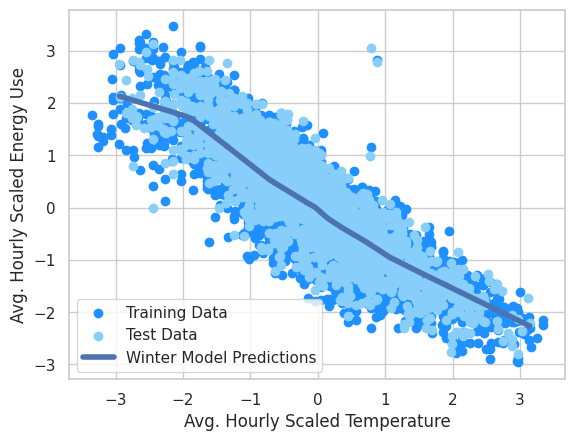

Spring Model MAE:
0.42
Spring R2 Score:
tf.Tensor(0.7273743, shape=(), dtype=float32)


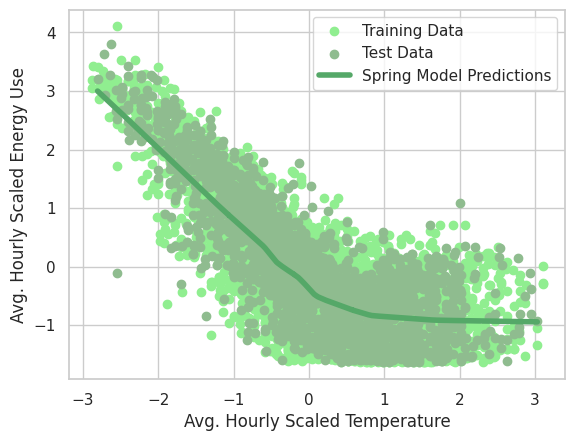

Summer Model MAE:
0.733
Summer R2 Score:
tf.Tensor(0.044754863, shape=(), dtype=float32)


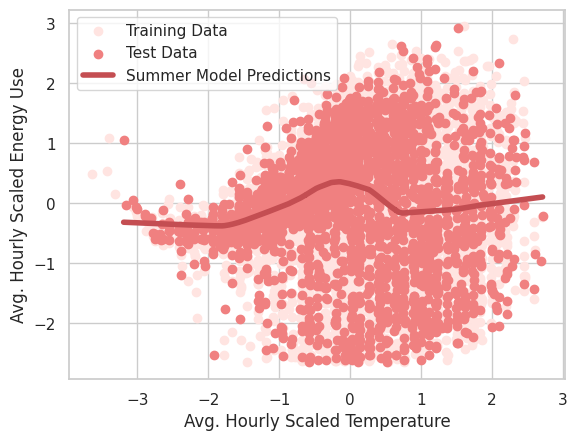

Fall Model MAE:
0.368
Fall R2 Score:
tf.Tensor(0.7643264, shape=(), dtype=float32)


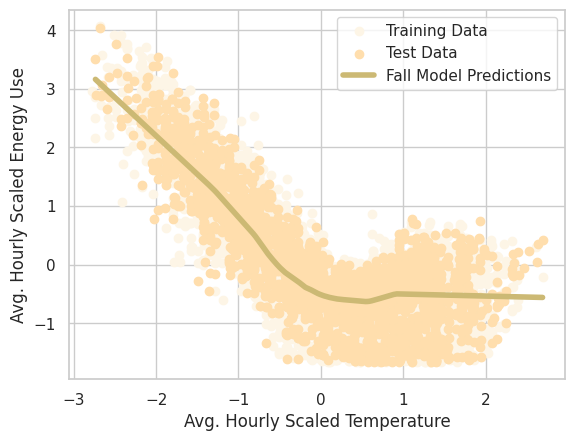

In [ ]:
# Plot each season with it's training and testing data

idx_win_h = np.argsort(X_h_win_nn_test.flatten())
# Winter
plot_X_h_nn_win_test = X_h_win_nn_test[idx_win_h]
plot_y_h_win_pred = y_h_win_pred.flatten()[idx_win_h]

idx_spr_h = np.argsort(X_h_spr_nn_test.flatten())
# Spring
plot_X_h_nn_spr_test = X_h_spr_nn_test[idx_spr_h]
plot_y_h_spr_pred = y_h_spr_pred.flatten()[idx_spr_h]

idx_sum_h = np.argsort(X_h_sum_nn_test.flatten())
# Summer
plot_X_h_nn_sum_test = X_h_sum_nn_test[idx_sum_h]
plot_y_h_sum_pred = y_h_sum_pred.flatten()[idx_sum_h]

idx_fal_h = np.argsort(X_h_fal_nn_test.flatten())
# Fall
plot_X_h_nn_fal_test = X_h_fal_nn_test[idx_fal_h]
plot_y_h_fal_pred = y_h_fal_pred.flatten()[idx_fal_h]

# Plot the actual Winter predictions
print("Winter Model MAE:")
print(mae_h_win_value)
print("Winter R2 Score:")
print(r2_result_h_win)
plt.scatter(X_h_win_nn_train, y_h_win_nn_train, label='Training Data', color='dodgerblue')
plt.scatter(X_h_win_nn_test, y_h_win_nn_test, label='Test Data', color='lightskyblue')
plt.plot(plot_X_h_nn_win_test, plot_y_h_win_pred, label='Winter Model Predictions', color='b', linewidth=4)
plt.xlabel('Avg. Hourly Scaled Temperature')
plt.ylabel('Avg. Hourly Scaled Energy Use')
plt.legend()
plt.show()

# Plot the actual Spring predictions
print("Spring Model MAE:")
print(mae_h_spr_value)
print("Spring R2 Score:")
print(r2_result_h_spr)
plt.scatter(X_h_spr_nn_train, y_h_spr_nn_train, label='Training Data', color='lightgreen')
plt.scatter(X_h_spr_nn_test, y_h_spr_nn_test, label='Test Data', color='darkseagreen')
plt.plot(plot_X_h_nn_spr_test, plot_y_h_spr_pred, label='Spring Model Predictions', color='g', linewidth=4)
plt.xlabel('Avg. Hourly Scaled Temperature')
plt.ylabel('Avg. Hourly Scaled Energy Use')
plt.legend()
plt.show()

# Plot the actual Summer predicitions
print("Summer Model MAE:")
print(mae_h_sum_value)
print("Summer R2 Score:")
print(r2_result_h_sum)
plt.scatter(X_h_sum_nn_train, y_h_sum_nn_train, label='Training Data', color='mistyrose')
plt.scatter(X_h_sum_nn_test, y_h_sum_nn_test, label='Test Data', color='lightcoral')
plt.plot(plot_X_h_nn_sum_test, plot_y_h_sum_pred, label='Summer Model Predictions', color='r', linewidth=4)
plt.xlabel('Avg. Hourly Scaled Temperature')
plt.ylabel('Avg. Hourly Scaled Energy Use')
plt.legend()
plt.show()

# Plot the actual Fall predictions
print("Fall Model MAE:")
print(mae_h_fal_value)
print("Fall R2 Score:")
print(r2_result_h_fal)
plt.scatter(X_h_fal_nn_train, y_h_fal_nn_train, label='Training Data', color='oldlace')
plt.scatter(X_h_fal_nn_test, y_h_fal_nn_test, label='Test Data', color='navajowhite')
plt.plot(plot_X_h_nn_fal_test, plot_y_h_fal_pred, label='Fall Model Predictions', color='y', linewidth=4)
plt.xlabel('Avg. Hourly Scaled Temperature')
plt.ylabel('Avg. Hourly Scaled Energy Use')
plt.legend()
plt.show()

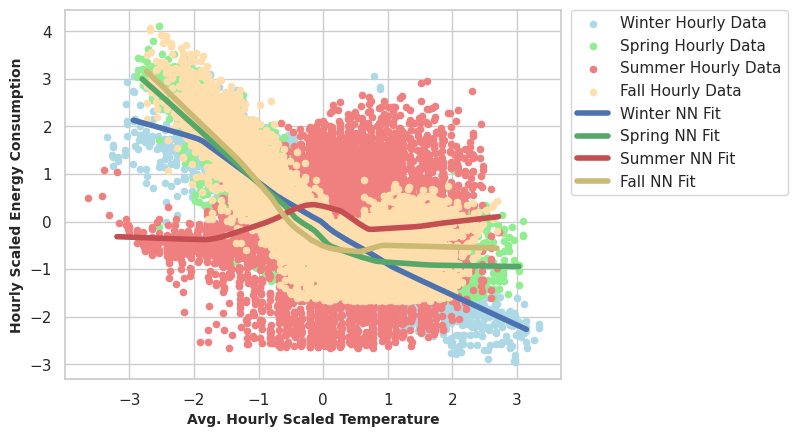

In [ ]:
# Plot ALL results
sns.set(style='whitegrid')
plt.scatter(X_h_win_temp, Y_h_win_ener, color='lightblue', s=20, label='Winter Hourly Data')
plt.scatter(X_h_spr_temp, Y_h_spr_ener, color='lightgreen', s=20, label='Spring Hourly Data')
plt.scatter(X_h_sum_temp, Y_h_sum_ener, color='lightcoral', s=20, label='Summer Hourly Data')
plt.scatter(X_h_fal_temp, Y_h_fal_ener, color='navajowhite', s=20, label='Fall Hourly Data')
plt.plot(plot_X_h_nn_win_test, plot_y_h_win_pred, color="b", linewidth=4, label='Winter NN Fit')
plt.plot(plot_X_h_nn_spr_test, plot_y_h_spr_pred, color="g", linewidth=4, label='Spring NN Fit')
plt.plot(plot_X_h_nn_sum_test, plot_y_h_sum_pred, color="r", linewidth=4, label='Summer NN Fit')
plt.plot(plot_X_h_nn_fal_test, plot_y_h_fal_pred, color="y", linewidth=4, label='Fall NN Fit')
plt.ylabel("Hourly Scaled Energy Consumption", fontweight ='bold', fontsize = 10)
plt.xlabel("Avg. Hourly Scaled Temperature", fontweight ='bold', fontsize = 10)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

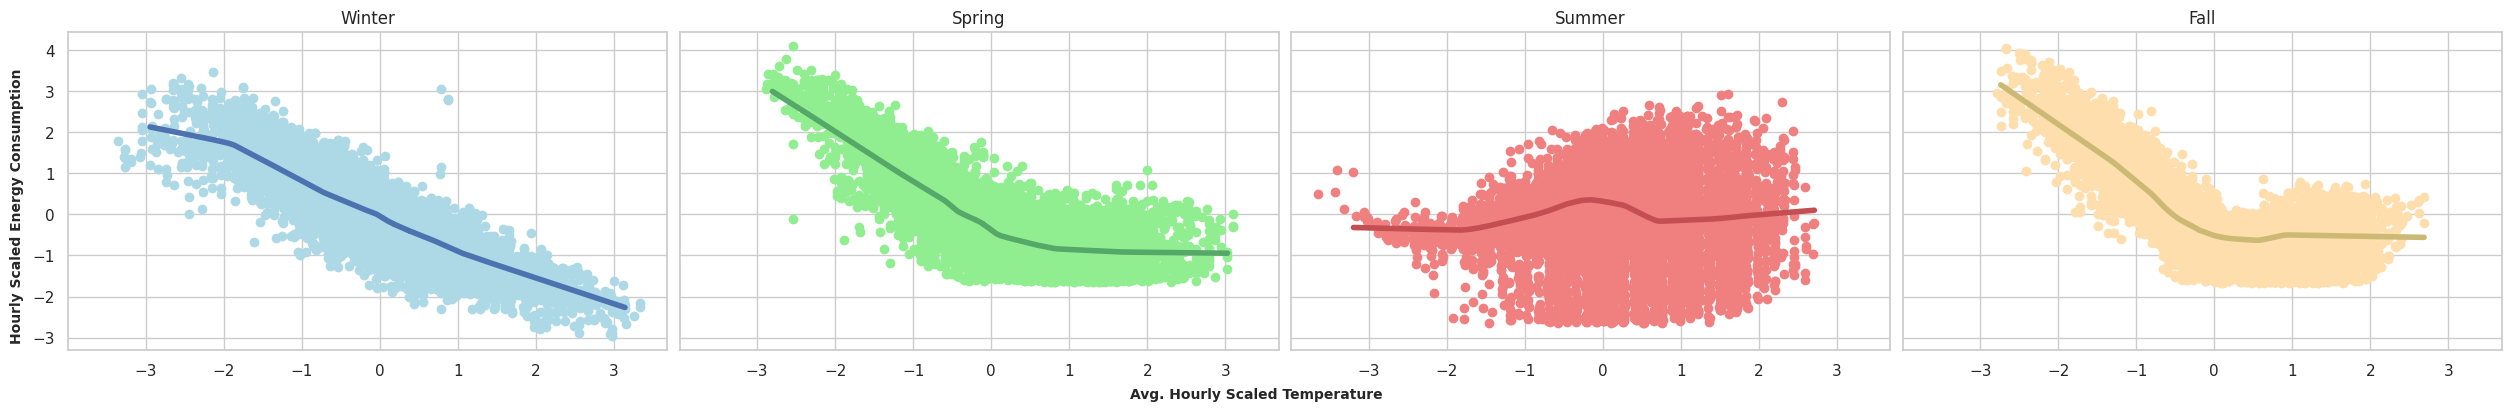

In [ ]:
# Side by side plot
# Plot it all together:
figure,  (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharex=True, sharey=True, constrained_layout=True, figsize=(25, 4))
ax1.plot(X_h_win_temp, Y_h_win_ener, color='lightblue', marker='o', linestyle='None', label='Winter Hourly Data')
ax1.plot(plot_X_h_nn_win_test, plot_y_h_win_pred, color="b", linewidth=4, label='Winter NN Fit')
ax1.set_title("Winter")
ax1.grid(True)

ax2.plot(X_h_spr_temp, Y_h_spr_ener, color='lightgreen', marker='o', linestyle='None', label='Spring Hourly Data')
ax2.plot(plot_X_h_nn_spr_test, plot_y_h_spr_pred, color="g", linewidth=4, label='Spring NN Fit')
ax2.set_title("Spring")
ax2.grid(True)

ax3.plot(X_h_sum_temp, Y_h_sum_ener, color='lightcoral', marker='o', linestyle='None', label='Summer Hourly Data')
ax3.plot(plot_X_h_nn_sum_test, plot_y_h_sum_pred, color="r", linewidth=4, label='Summer NN Fit')
ax3.set_title("Summer")
ax3.grid(True)

ax4.plot(X_h_fal_temp, Y_h_fal_ener, color='navajowhite', marker='o', linestyle='None', label='Fall Hourly Data')
ax4.plot(plot_X_h_nn_fal_test, plot_y_h_fal_pred, color="y", linewidth=4, label='Fall NN Fit')
ax4.set_title("Fall")
ax4.grid(True)

figure.supxlabel('Avg. Hourly Scaled Temperature', fontweight ='bold', fontsize = 10)
figure.supylabel('Hourly Scaled Energy Consumption', fontweight ='bold', fontsize = 10)
#figure.legend(custom_lines, ['Winter', 'Spring', 'Summer', 'Fall'], loc='lower right', ncol=4)
plt.show()

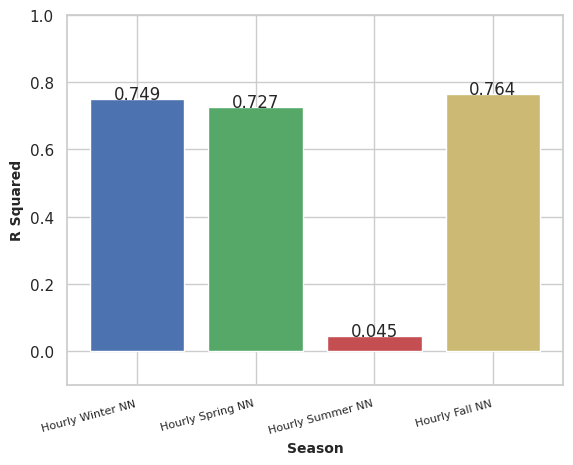

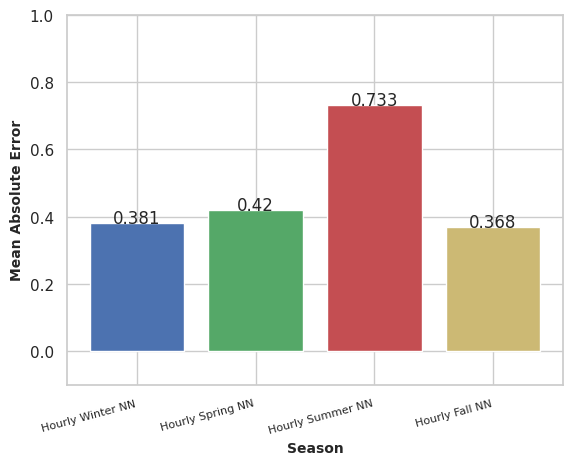

In [ ]:
# Create a bar-chart to demonstrate the difference in fit between each seasonal model
# Function to place labels at the center of each bar
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha='center')  # Aligning text at center

# First R2
plt.ylim(-0.1, 1)
bar_positions = np.arange(4)

label_h_nn_x_r2 = ['Hourly Winter', 'Hourly Spring', 'Hourly Summer', 'Hourly Fall']
label_h_nn_y_r2 = [r2_result_h_win_round, r2_result_h_spr_round, r2_result_h_sum_round, r2_result_h_fal_round]

plt.bar(bar_positions[0], r2_result_h_win_round, color ='b', edgecolor ='w', label ='Winter NN Hourly R2')
plt.bar(bar_positions[1], r2_result_h_spr_round, color ='g', edgecolor ='w', label ='Spring NN Hourly R2')
plt.bar(bar_positions[2], r2_result_h_sum_round, color ='r', edgecolor ='w', label ='Summer NN Hourly R2')
plt.bar(bar_positions[3], r2_result_h_fal_round, color ='y', edgecolor ='w', label ='Fall NN Hourly R2')
plt.xticks(bar_positions, ['Hourly Winter NN', 'Hourly Spring NN', 'Hourly Summer NN', 'Hourly Fall NN'], fontsize=8, rotation=15, ha='right')

add_labels(label_h_nn_x_r2, label_h_nn_y_r2)

plt.xlabel('Season', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

# Next MAE
plt.ylim(-0.1, 1)
bar_positions = np.arange(4)

label_h_nn_x_mae = ['Hourly Winter', 'Hourly Spring', 'Hourly Summer', 'Hourly Fall']
label_h_nn_y_mae = [mae_h_win_value, mae_h_spr_value, mae_h_sum_value, mae_h_fal_value]

plt.bar(bar_positions[0], mae_h_win_value, color ='b', edgecolor ='w', label ='Winter NN Hourly MAE')
plt.bar(bar_positions[1], mae_h_spr_value, color ='g', edgecolor ='w', label ='Spring NN Hourly MAE')
plt.bar(bar_positions[2], mae_h_sum_value, color ='r', edgecolor ='w', label ='Summer NN Hourly MAE')
plt.bar(bar_positions[3], mae_h_fal_value, color ='y', edgecolor ='w', label ='Fall NN Hourly MAE')
plt.xticks(bar_positions, ['Hourly Winter NN', 'Hourly Spring NN', 'Hourly Summer NN', 'Hourly Fall NN'], fontsize=8, rotation=15, ha='right')

add_labels(label_h_nn_x_mae, label_h_nn_y_mae)

plt.xlabel('Season', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()

# Building 1, Seasonal Energy Use Analysis, Performance Benchmarking

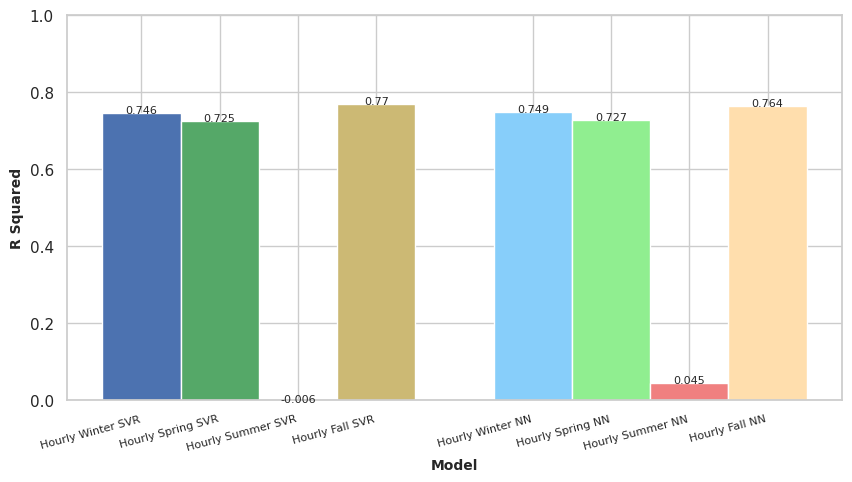

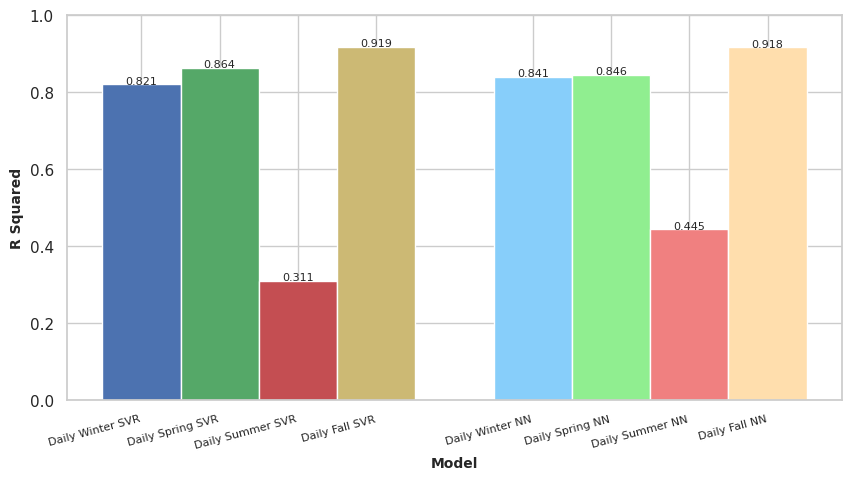

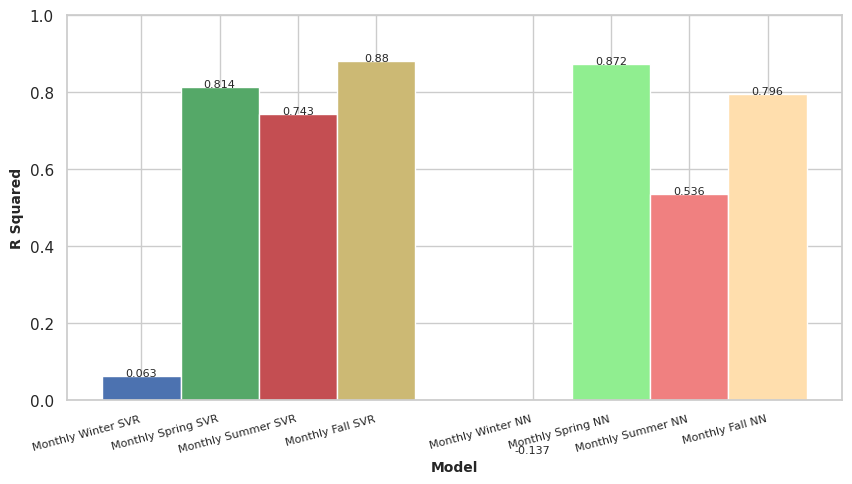

In [ ]:
# Compare ALL R2 Against Eachother for Comparative Analysis
# Function to place labels at the center of each bar
def add_labels(l, x, y):
    for i in range(len(l)):
        plt.text(l[i], y[i], y[i], ha='center', fontsize=8)  # Aligning text at center

# HOURLY R2 COMPARISON
fig = plt.figure(figsize=(10, 5))
plt.ylim(0, 1)
bar_positions = [0,0.8,1.6,2.4, 4,4.8,5.6,6.4]

label_h_all_x_r2 = [label_h_svr_x_r2[0], label_h_svr_x_r2[1], label_h_svr_x_r2[2], label_h_svr_x_r2[3],
                    label_h_nn_x_r2[0], label_h_nn_x_r2[1], label_h_nn_x_r2[2], label_h_nn_x_r2[3]]

label_h_all_y_r2 = [label_h_svr_y_r2[0], label_h_svr_y_r2[1], label_h_svr_y_r2[2], label_h_svr_y_r2[3],
                    label_h_nn_y_r2[0], label_h_nn_y_r2[1], label_h_nn_y_r2[2], label_h_nn_y_r2[3]]

plt.bar(bar_positions[0], svr_r2_h_win, color ='b', edgecolor ='w', label ='Hourly Winter SVR R2')
plt.bar(bar_positions[1], svr_r2_h_spr, color ='g', edgecolor ='w', label ='Hourly Spring SVR R2')
plt.bar(bar_positions[2], svr_r2_h_sum, color ='r', edgecolor ='w', label ='Hourly Summer SVR R2')
plt.bar(bar_positions[3], svr_r2_h_fal, color ='y', edgecolor ='w', label ='Hourly Fall SVR R2')
plt.bar(bar_positions[4], r2_result_h_win_round, color ='lightskyblue', edgecolor ='w', label ='Hourly Winter NN R2')
plt.bar(bar_positions[5], r2_result_h_spr_round, color ='lightgreen', edgecolor ='w', label ='Hourly Spring NN R2')
plt.bar(bar_positions[6], r2_result_h_sum_round, color ='lightcoral', edgecolor ='w', label ='Hourly Summer NN R2')
plt.bar(bar_positions[7], r2_result_h_fal_round, color ='navajowhite', edgecolor ='w', label ='Hourly Fall NN R2')
plt.xticks(bar_positions, ['Hourly Winter SVR', 'Hourly Spring SVR', 'Hourly Summer SVR','Hourly Fall SVR',
                           'Hourly Winter NN', 'Hourly Spring NN', 'Hourly Summer NN', 'Hourly Fall NN'], fontsize = 8, rotation=15, ha='right')

add_labels(bar_positions, label_h_all_x_r2, label_h_all_y_r2)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

# DAILY R2 COMPARISON
fig = plt.figure(figsize=(10, 5))
plt.ylim(0, 1)
bar_positions = [0,0.8,1.6,2.4, 4,4.8,5.6,6.4]

label_d_all_x_r2 = [label_d_svr_x_r2[0], label_d_svr_x_r2[1], label_d_svr_x_r2[2], label_d_svr_x_r2[3],
                    label_d_nn_x_r2[0], label_d_nn_x_r2[1], label_d_nn_x_r2[2], label_d_nn_x_r2[3]]

label_d_all_y_r2 = [label_d_svr_y_r2[0], label_d_svr_y_r2[1], label_d_svr_y_r2[2], label_d_svr_y_r2[3],
                    label_d_nn_y_r2[0], label_d_nn_y_r2[1], label_d_nn_y_r2[2], label_d_nn_y_r2[3]]

plt.bar(bar_positions[0], svr_r2_d_win, color ='b', edgecolor ='w', label ='Daily Winter SVR R2')
plt.bar(bar_positions[1], svr_r2_d_spr, color ='g', edgecolor ='w', label ='Daily Spring SVR R2')
plt.bar(bar_positions[2], svr_r2_d_sum, color ='r', edgecolor ='w', label ='Daily Summer SVR R2')
plt.bar(bar_positions[3], svr_r2_d_fal, color ='y', edgecolor ='w', label ='Daily Fall SVR R2')
plt.bar(bar_positions[4], r2_result_d_win_round, color ='lightskyblue', edgecolor ='w', label ='Daily Winter NN R2')
plt.bar(bar_positions[5], r2_result_d_spr_round, color ='lightgreen', edgecolor ='w', label ='Daily Spring NN R2')
plt.bar(bar_positions[6], r2_result_d_sum_round, color ='lightcoral', edgecolor ='w', label ='Daily Summer NN R2')
plt.bar(bar_positions[7], r2_result_d_fal_round, color ='navajowhite', edgecolor ='w', label ='Daily Fall NN R2')
plt.xticks(bar_positions, ['Daily Winter SVR', 'Daily Spring SVR', 'Daily Summer SVR','Daily Fall SVR',
                           'Daily Winter NN', 'Daily Spring NN', 'Daily Summer NN', 'Daily Fall NN'], fontsize = 8, rotation=15, ha='right')

add_labels(bar_positions, label_d_all_x_r2, label_d_all_y_r2)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

# MONTHLY R2 COMPARISON
fig = plt.figure(figsize=(10, 5))
plt.ylim(0, 1)
bar_positions = [0,0.8,1.6,2.4, 4,4.8,5.6,6.4]

label_m_all_x_r2 = [label_m_svr_x_r2[0], label_m_svr_x_r2[1], label_m_svr_x_r2[2], label_m_svr_x_r2[3],
                    label_m_nn_x_r2[0], label_m_nn_x_r2[1], label_m_nn_x_r2[2], label_m_nn_x_r2[3]]

label_m_all_y_r2 = [label_m_svr_y_r2[0], label_m_svr_y_r2[1], label_m_svr_y_r2[2], label_m_svr_y_r2[3],
                    label_m_nn_y_r2[0], label_m_nn_y_r2[1], label_m_nn_y_r2[2], label_m_nn_y_r2[3]]

plt.bar(bar_positions[0], svr_r2_m_win, color ='b', edgecolor ='w', label ='Monthly Winter SVR R2')
plt.bar(bar_positions[1], svr_r2_m_spr, color ='g', edgecolor ='w', label ='Monthly Spring SVR R2')
plt.bar(bar_positions[2], svr_r2_m_sum, color ='r', edgecolor ='w', label ='Monthly Summer SVR R2')
plt.bar(bar_positions[3], svr_r2_m_fal, color ='y', edgecolor ='w', label ='Monthly Fall SVR R2')
plt.bar(bar_positions[4], r2_result_m_win_round, color ='lightskyblue', edgecolor ='w', label ='Monthly Winter NN R2')
plt.bar(bar_positions[5], r2_result_m_spr_round, color ='lightgreen', edgecolor ='w', label ='Monthly Spring NN R2')
plt.bar(bar_positions[6], r2_result_m_sum_round, color ='lightcoral', edgecolor ='w', label ='Monthly Summer NN R2')
plt.bar(bar_positions[7], r2_result_m_fal_round, color ='navajowhite', edgecolor ='w', label ='Monthly Fall NN R2')
plt.xticks(bar_positions, ['Monthly Winter SVR', 'Monthly Spring SVR', 'Monthly Summer SVR','Monthly Fall SVR',
                           'Monthly Winter NN', 'Monthly Spring NN', 'Monthly Summer NN', 'Monthly Fall NN'], fontsize = 8, rotation=15, ha='right')

add_labels(bar_positions, label_m_all_x_r2, label_m_all_y_r2)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('R Squared', fontweight ='bold', fontsize = 10)
plt.show()

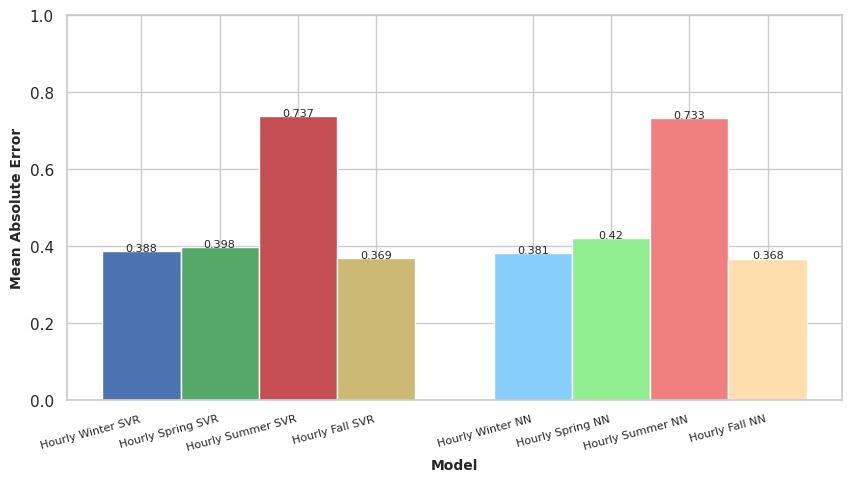

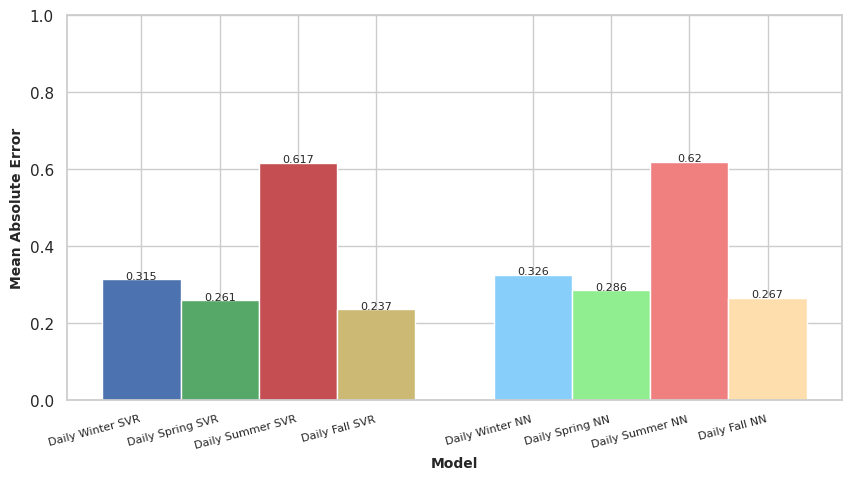

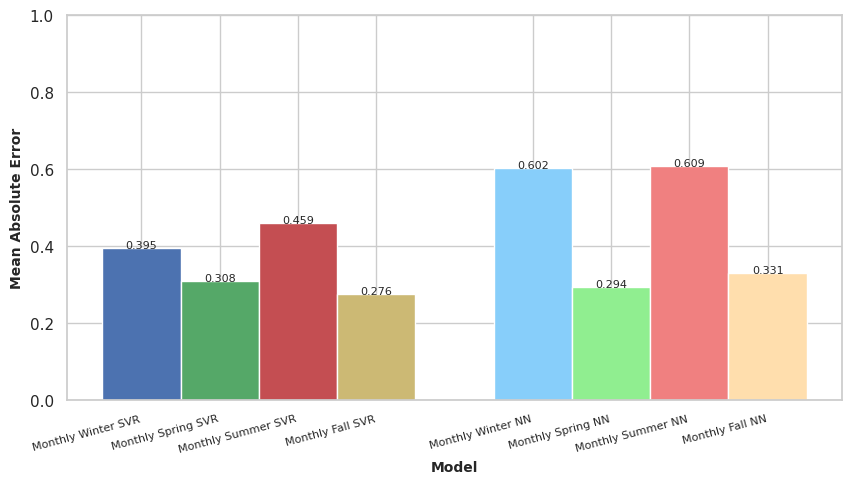

In [ ]:
# Compare ALL MAE Against Eachother for Comparative Analysis
# Function to place labels at the center of each bar
def add_labels(l, x, y):
    for i in range(len(l)):
        plt.text(l[i], y[i], y[i], ha='center', fontsize=8)  # Aligning text at center

# HOURLY MAE COMPARISON
fig = plt.figure(figsize=(10, 5))
plt.ylim(0, 1)
bar_positions = [0,0.8,1.6,2.4, 4,4.8,5.6,6.4]

label_h_all_x_mae = [label_h_svr_x_mae[0], label_h_svr_x_mae[1], label_h_svr_x_mae[2], label_h_svr_x_mae[3],
                    label_h_nn_x_mae[0], label_h_nn_x_mae[1], label_h_nn_x_mae[2], label_h_nn_x_mae[3]]

label_h_all_y_mae = [label_h_svr_y_mae[0], label_h_svr_y_mae[1], label_h_svr_y_mae[2], label_h_svr_y_mae[3],
                    label_h_nn_y_mae[0], label_h_nn_y_mae[1], label_h_nn_y_mae[2], label_h_nn_y_mae[3]]

plt.bar(bar_positions[0], svr_mae_h_win, color ='b', edgecolor ='w', label ='Hourly Winter SVR MAE')
plt.bar(bar_positions[1], svr_mae_h_spr, color ='g', edgecolor ='w', label ='Hourly Spring SVR MAE')
plt.bar(bar_positions[2], svr_mae_h_sum, color ='r', edgecolor ='w', label ='Hourly Summer SVR MAE')
plt.bar(bar_positions[3], svr_mae_h_fal, color ='y', edgecolor ='w', label ='Hourly Fall SVR MAE')
plt.bar(bar_positions[4], mae_h_win_value, color ='lightskyblue', edgecolor ='w', label ='Hourly Winter NN MAE')
plt.bar(bar_positions[5], mae_h_spr_value, color ='lightgreen', edgecolor ='w', label ='Hourly Spring NN MAE')
plt.bar(bar_positions[6], mae_h_sum_value, color ='lightcoral', edgecolor ='w', label ='Hourly Summer NN MAE')
plt.bar(bar_positions[7], mae_h_fal_value, color ='navajowhite', edgecolor ='w', label ='Hourly Fall NN MAE')
plt.xticks(bar_positions, ['Hourly Winter SVR', 'Hourly Spring SVR', 'Hourly Summer SVR','Hourly Fall SVR',
                           'Hourly Winter NN', 'Hourly Spring NN', 'Hourly Summer NN', 'Hourly Fall NN'], fontsize = 8, rotation=15, ha='right')

add_labels(bar_positions, label_h_all_x_mae, label_h_all_y_mae)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()

# DAILY MAE COMPARISON
fig = plt.figure(figsize=(10, 5))
plt.ylim(0, 1)
bar_positions = [0,0.8,1.6,2.4, 4,4.8,5.6,6.4]

label_d_all_x_mae = [label_d_svr_x_mae[0], label_d_svr_x_mae[1], label_d_svr_x_mae[2], label_d_svr_x_mae[3],
                    label_d_nn_x_mae[0], label_d_nn_x_mae[1], label_d_nn_x_mae[2], label_d_nn_x_mae[3]]

label_d_all_y_mae = [label_d_svr_y_mae[0], label_d_svr_y_mae[1], label_d_svr_y_mae[2], label_d_svr_y_mae[3],
                    label_d_nn_y_mae[0], label_d_nn_y_mae[1], label_d_nn_y_mae[2], label_d_nn_y_mae[3]]

plt.bar(bar_positions[0], svr_mae_d_win, color ='b', edgecolor ='w', label ='Daily Winter SVR MAE')
plt.bar(bar_positions[1], svr_mae_d_spr, color ='g', edgecolor ='w', label ='Daily Spring SVR MAE')
plt.bar(bar_positions[2], svr_mae_d_sum, color ='r', edgecolor ='w', label ='Daily Summer SVR MAE')
plt.bar(bar_positions[3], svr_mae_d_fal, color ='y', edgecolor ='w', label ='Daily Fall SVR MAE')
plt.bar(bar_positions[4], mae_d_win_value, color ='lightskyblue', edgecolor ='w', label ='Daily Winter NN MAE')
plt.bar(bar_positions[5], mae_d_spr_value, color ='lightgreen', edgecolor ='w', label ='Daily Spring NN MAE')
plt.bar(bar_positions[6], mae_d_sum_value, color ='lightcoral', edgecolor ='w', label ='Daily Summer NN MAE')
plt.bar(bar_positions[7], mae_d_fal_value, color ='navajowhite', edgecolor ='w', label ='Daily Fall NN MAE')
plt.xticks(bar_positions, ['Daily Winter SVR', 'Daily Spring SVR', 'Daily Summer SVR','Daily Fall SVR',
                           'Daily Winter NN', 'Daily Spring NN', 'Daily Summer NN', 'Daily Fall NN'], fontsize = 8, rotation=15, ha='right')

add_labels(bar_positions, label_d_all_x_mae, label_d_all_y_mae)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()

# MONTHLY MAE COMPARISON
fig = plt.figure(figsize=(10, 5))
plt.ylim(0, 1)
bar_positions = [0,0.8,1.6,2.4, 4,4.8,5.6,6.4]

label_m_all_x_mae = [label_m_svr_x_mae[0], label_m_svr_x_mae[1], label_m_svr_x_mae[2], label_m_svr_x_mae[3],
                    label_m_nn_x_mae[0], label_m_nn_x_mae[1], label_m_nn_x_mae[2], label_m_nn_x_mae[3]]

label_m_all_y_mae = [label_m_svr_y_mae[0], label_m_svr_y_mae[1], label_m_svr_y_mae[2], label_m_svr_y_mae[3],
                    label_m_nn_y_mae[0], label_m_nn_y_mae[1], label_m_nn_y_mae[2], label_m_nn_y_mae[3]]

plt.bar(bar_positions[0], svr_mae_m_win, color ='b', edgecolor ='w', label ='Monthly Winter SVR MAE')
plt.bar(bar_positions[1], svr_mae_m_spr, color ='g', edgecolor ='w', label ='Monthly Spring SVR MAE')
plt.bar(bar_positions[2], svr_mae_m_sum, color ='r', edgecolor ='w', label ='Monthly Summer SVR MAE')
plt.bar(bar_positions[3], svr_mae_m_fal, color ='y', edgecolor ='w', label ='Monthly Fall SVR MAE')
plt.bar(bar_positions[4], mae_m_win_value, color ='lightskyblue', edgecolor ='w', label ='Monthly Winter NN MAE')
plt.bar(bar_positions[5], mae_m_spr_value, color ='lightgreen', edgecolor ='w', label ='Monthly Spring NN MAE')
plt.bar(bar_positions[6], mae_m_sum_value, color ='lightcoral', edgecolor ='w', label ='Monthly Summer NN MAE')
plt.bar(bar_positions[7], mae_m_fal_value, color ='navajowhite', edgecolor ='w', label ='Monthly Fall NN MAE')
plt.xticks(bar_positions, ['Monthly Winter SVR', 'Monthly Spring SVR', 'Monthly Summer SVR','Monthly Fall SVR',
                           'Monthly Winter NN', 'Monthly Spring NN', 'Monthly Summer NN', 'Monthly Fall NN'], fontsize = 8, rotation=15, ha='right')

add_labels(bar_positions, label_m_all_x_mae, label_m_all_y_mae)

plt.xlabel('Model', fontweight ='bold', fontsize = 10)
plt.ylabel('Mean Absolute Error', fontweight ='bold', fontsize = 10)
plt.show()